# **INTRO**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_train = pd.read_csv('store5.csv') #load data
df_train

id        date  store_nbr                      family     sales  \
0         1452  2013-01-01          5                  AUTOMOTIVE     0.000   
1         1453  2013-01-01          5                   BABY CARE     0.000   
2         1454  2013-01-01          5                      BEAUTY     0.000   
3         1455  2013-01-01          5                   BEVERAGES     0.000   
4         1456  2013-01-01          5                       BOOKS     0.000   
...        ...         ...        ...                         ...       ...   
55567  3000586  2017-08-15          5                     POULTRY   241.011   
55568  3000587  2017-08-15          5              PREPARED FOODS    52.121   
55569  3000588  2017-08-15          5                     PRODUCE  1357.823   
55570  3000589  2017-08-15          5  SCHOOL AND OFFICE SUPPLIES     0.000   
55571  3000590  2017-08-15          5                     SEAFOOD     9.669   

       onpromotion  dcoilwtico  
0                0         NaN  
1                0         NaN  
2                0         NaN  
3                0         NaN  
4                0         NaN  
...            ...         ...  
55567            1       47.57  
55568            0       47.57  
55569            4       47.57  
55570            0       47.57  
55571            0       47.57  

[55572 rows x 7 columns]

In [ ]:
df_train['family'].value_counts()

AUTOMOTIVE                    1684
BABY CARE                     1684
BEAUTY                        1684
BEVERAGES                     1684
BOOKS                         1684
BREAD/BAKERY                  1684
CELEBRATION                   1684
CLEANING                      1684
DAIRY                         1684
DELI                          1684
EGGS                          1684
FROZEN FOODS                  1684
GROCERY I                     1684
GROCERY II                    1684
HARDWARE                      1684
HOME AND KITCHEN I            1684
HOME AND KITCHEN II           1684
HOME APPLIANCES               1684
HOME CARE                     1684
LADIESWEAR                    1684
LAWN AND GARDEN               1684
LINGERIE                      1684
LIQUOR,WINE,BEER              1684
MAGAZINES                     1684
MEATS                         1684
PERSONAL CARE                 1684
PET SUPPLIES                  1684
PLAYERS AND ELECTRONICS       1684
POULTRY             

##**Cleaning**

In [2]:
# hapus kolom id dan store_nbr
df_train.drop(['id', 'store_nbr'], axis=1, inplace=True)
df_copy = df_train.copy()

In [3]:
# Mengubah tipe data kolom date menjadi datetime
df_train['date'] = pd.to_datetime(df_train['date'])

In [4]:
# Mengurutkan data berdasarkan tanggal
df_train = df_train.set_index('date')

In [ ]:
# tampilan baru
df_train

family     sales  onpromotion  dcoilwtico
date                                                                     
2013-01-01                  AUTOMOTIVE     0.000            0         NaN
2013-01-01                   BABY CARE     0.000            0         NaN
2013-01-01                      BEAUTY     0.000            0         NaN
2013-01-01                   BEVERAGES     0.000            0         NaN
2013-01-01                       BOOKS     0.000            0         NaN
...                                ...       ...          ...         ...
2017-08-15                     POULTRY   241.011            1       47.57
2017-08-15              PREPARED FOODS    52.121            0       47.57
2017-08-15                     PRODUCE  1357.823            4       47.57
2017-08-15  SCHOOL AND OFFICE SUPPLIES     0.000            0       47.57
2017-08-15                     SEAFOOD     9.669            0       47.57

[55572 rows x 4 columns]

# **EDA & Modeling**

## **Imputasi Umum**

In [5]:
df_train['dcoilwtico'] = df_train['dcoilwtico'].fillna(method='ffill') #imputasi oil price dengan forward fill

In [ ]:
print(df_train['dcoilwtico'].isnull().sum())

33


In [6]:
df_train['dcoilwtico'] = df_train['dcoilwtico'].fillna(method='bfill') #imputasi oil price dengan backward fill untuk 33 baris pertama

In [ ]:
print(df_train['dcoilwtico'].isnull().sum())

0


In [ ]:
df_train

family     sales  onpromotion  dcoilwtico
date                                                                     
2013-01-01                  AUTOMOTIVE     0.000            0       93.14
2013-01-01                   BABY CARE     0.000            0       93.14
2013-01-01                      BEAUTY     0.000            0       93.14
2013-01-01                   BEVERAGES     0.000            0       93.14
2013-01-01                       BOOKS     0.000            0       93.14
...                                ...       ...          ...         ...
2017-08-15                     POULTRY   241.011            1       47.57
2017-08-15              PREPARED FOODS    52.121            0       47.57
2017-08-15                     PRODUCE  1357.823            4       47.57
2017-08-15  SCHOOL AND OFFICE SUPPLIES     0.000            0       47.57
2017-08-15                     SEAFOOD     9.669            0       47.57

[55572 rows x 4 columns]

## **Visualisasi & Processing Umum**

In [ ]:
daily_sales = df_train.groupby('date')['sales'].sum() #penjualan harian berdasar waktu (semua kategori dalam 'family')
daily_sales

date
2013-01-01        0.000000
2013-01-02    10598.619020
2013-01-03     7770.968000
2013-01-04     7347.641991
2013-01-05     8192.598000
                  ...     
2017-08-11     9510.871000
2017-08-12     8157.070000
2017-08-13    10044.821000
2017-08-14     9011.574900
2017-08-15     8703.693000
Name: sales, Length: 1684, dtype: float64

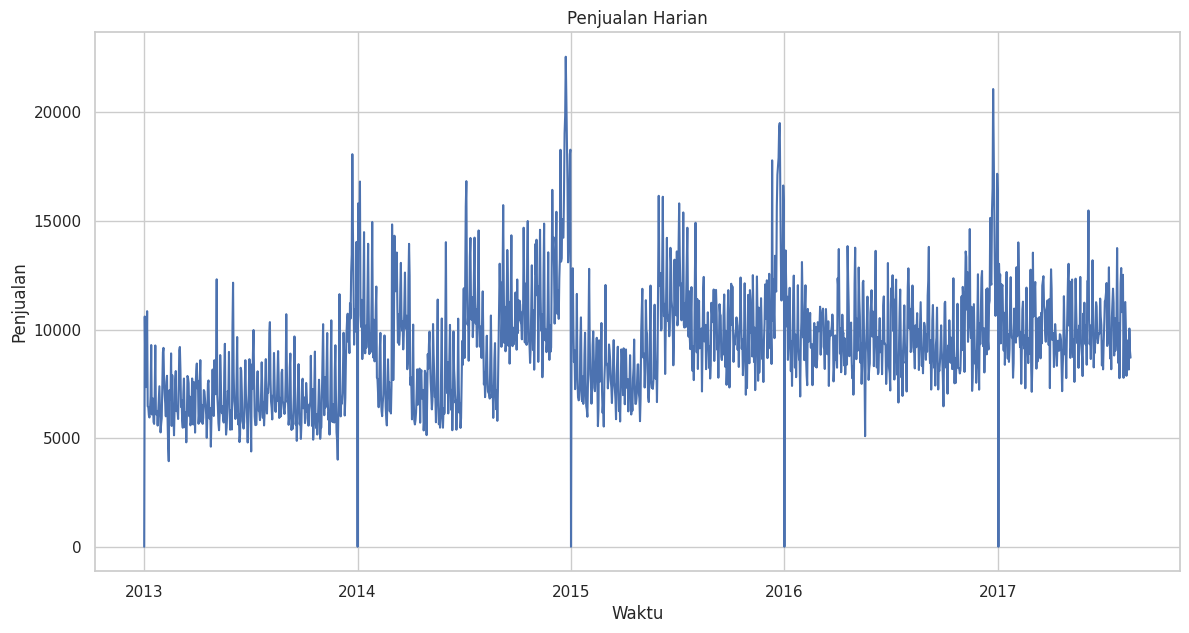

In [ ]:
# plot visualisasi daily_sales
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')
plt.plot(daily_sales)
plt.title('Penjualan Harian')
plt.xlabel('Waktu')
plt.ylabel('Penjualan')
plt.show()

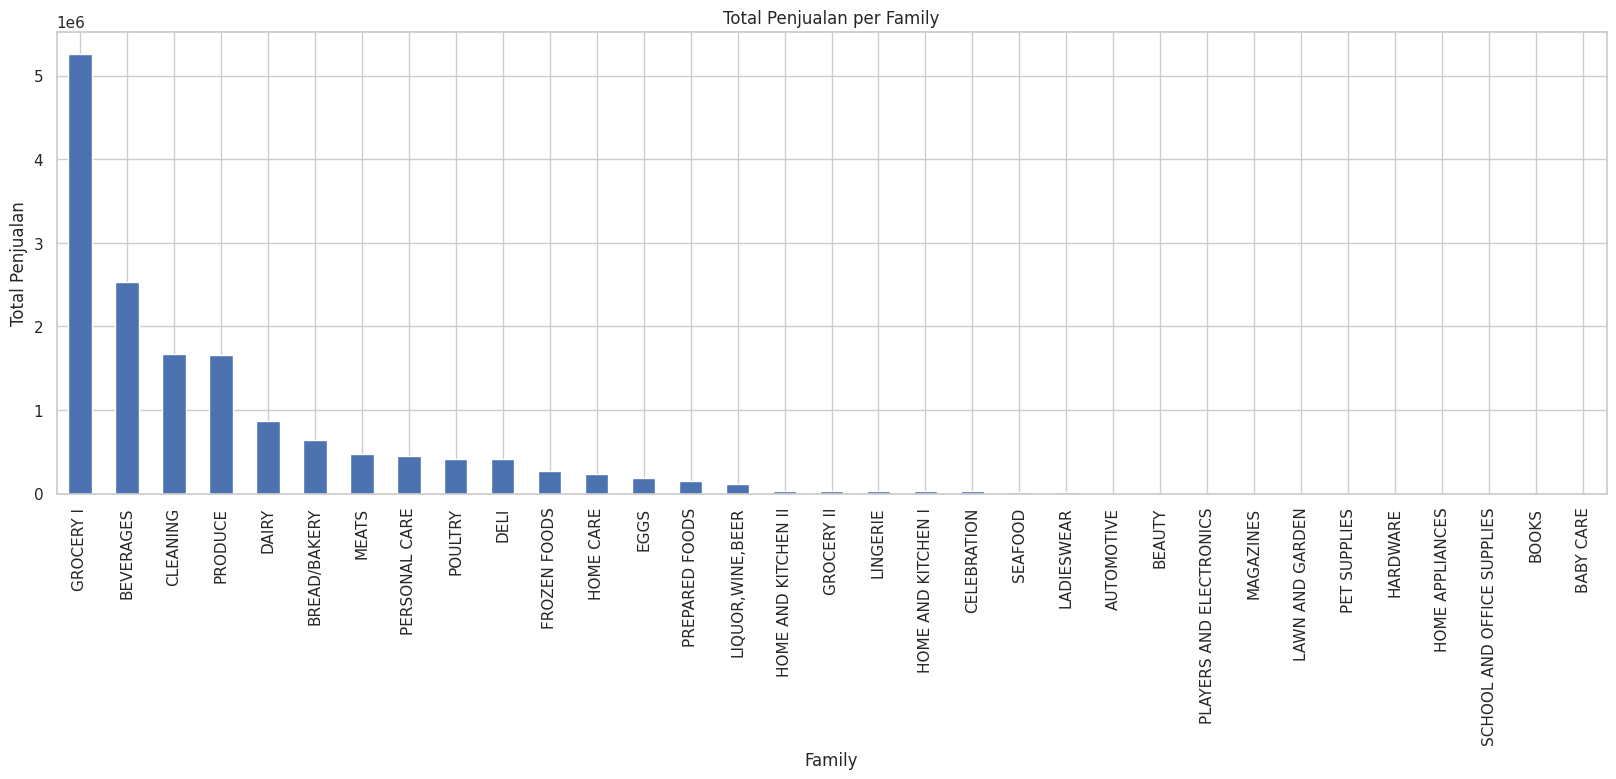

family
GROCERY I                     5262681.66
BEVERAGES                     2533831.00
CLEANING                      1667748.00
PRODUCE                       1653582.26
DAIRY                          871283.00
BREAD/BAKERY                   642854.56
MEATS                          477104.41
PERSONAL CARE                  450166.00
POULTRY                        419630.37
DELI                           415271.00
FROZEN FOODS                   269669.20
HOME CARE                      239283.00
EGGS                           190851.00
PREPARED FOODS                 147991.13
LIQUOR,WINE,BEER               110414.00
HOME AND KITCHEN II             37238.00
GROCERY II                      33241.00
LINGERIE                        31561.00
HOME AND KITCHEN I              30107.00
CELEBRATION                     26176.00
SEAFOOD                         22358.99
LADIESWEAR                      14813.00
AUTOMOTIVE                       9194.00
BEAUTY                           8684.00
PLAYERS A

In [ ]:
# plot data total penjualan berdasarkan family
plt.figure(figsize=(20,6))
sns.set(style='whitegrid')

# Gunakan fungsi groupby dan sum untuk menghitung total penjualan per family
df_train.groupby('family')['sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Penjualan per Family')
plt.xlabel('Family')
plt.ylabel('Total Penjualan')
plt.show()

# data numerik
df_train.groupby('family')['sales'].sum().sort_values(ascending=False).apply(lambda x: f'{x:.2f}') #--> apply lambda agar tidak pake notasi ilmiah

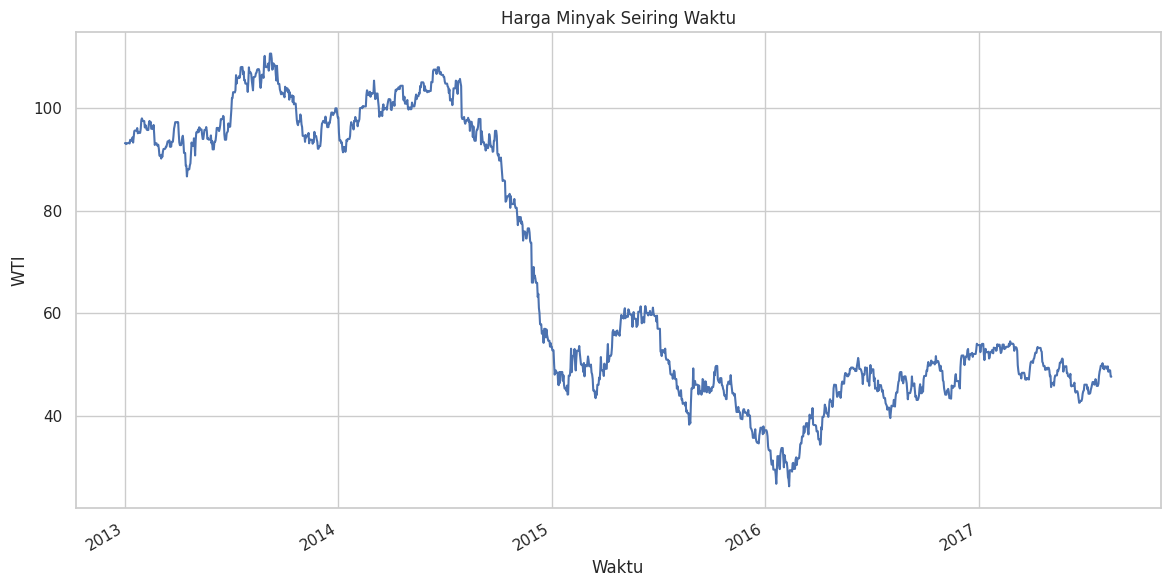

In [ ]:
#WTI (West texas intermediate), merupakan harga minyak mentah yang menjadi benchmark untuk harga minyak seluruh dunia (laman investopedia tentang wti: https://www.investopedia.com/terms/w/wti.asp)
dcoilwtico = df_train['dcoilwtico']

# Plot dcoilwtico
plt.figure(figsize=(14,7))
sns.set(style='whitegrid')
dcoilwtico.plot()
plt.title('Harga Minyak Seiring Waktu')
plt.xlabel('Waktu')
plt.ylabel('WTI')
plt.show()

##**Visualisasi, Processing dan Modeling per-family produk**

### **Rio (Automotive & Beauty)**

####**AUTOMOTIVE**

In [7]:
# buat DataFrame baru untuk family AUTOMOTIVE
auto = df_train['family']=='AUTOMOTIVE'
auto = df_train[auto]
auto

family  sales  onpromotion  dcoilwtico
date                                                  
2013-01-01  AUTOMOTIVE    0.0            0       93.14
2013-01-02  AUTOMOTIVE    6.0            0       93.14
2013-01-03  AUTOMOTIVE    4.0            0       92.97
2013-01-04  AUTOMOTIVE    6.0            0       93.12
2013-01-05  AUTOMOTIVE    4.0            0       93.12
...                ...    ...          ...         ...
2017-08-11  AUTOMOTIVE   12.0            0       48.81
2017-08-12  AUTOMOTIVE    1.0            0       48.81
2017-08-13  AUTOMOTIVE   15.0            0       48.81
2017-08-14  AUTOMOTIVE    6.0            0       47.59
2017-08-15  AUTOMOTIVE    9.0            0       47.57

[1684 rows x 4 columns]

In [8]:
auto_sales = auto.groupby('date')['sales'].sum()

In [ ]:
auto_sales

date
2013-01-01     0.0
2013-01-02     6.0
2013-01-03     4.0
2013-01-04     6.0
2013-01-05     4.0
              ... 
2017-08-11    12.0
2017-08-12     1.0
2017-08-13    15.0
2017-08-14     6.0
2017-08-15     9.0
Name: sales, Length: 1684, dtype: float64

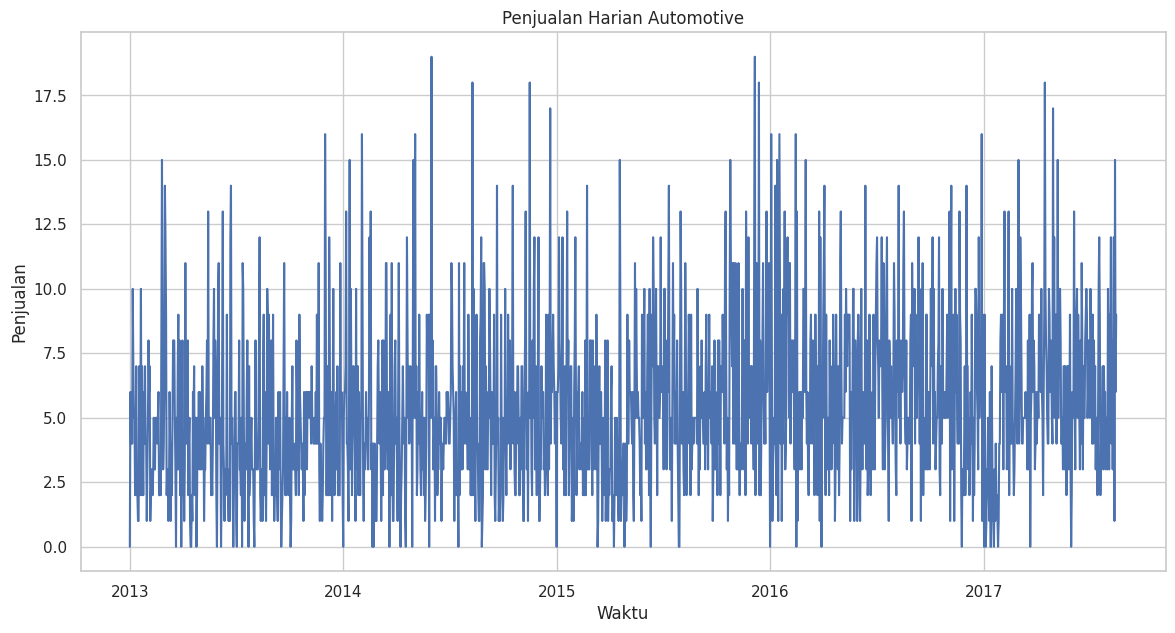

In [ ]:
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')
plt.plot(auto_sales)
plt.title('Penjualan Harian Automotive')
plt.xlabel('Waktu')
plt.ylabel('Penjualan')
plt.show()

In [9]:
# import library
from statsmodels.tsa.seasonal import seasonal_decompose

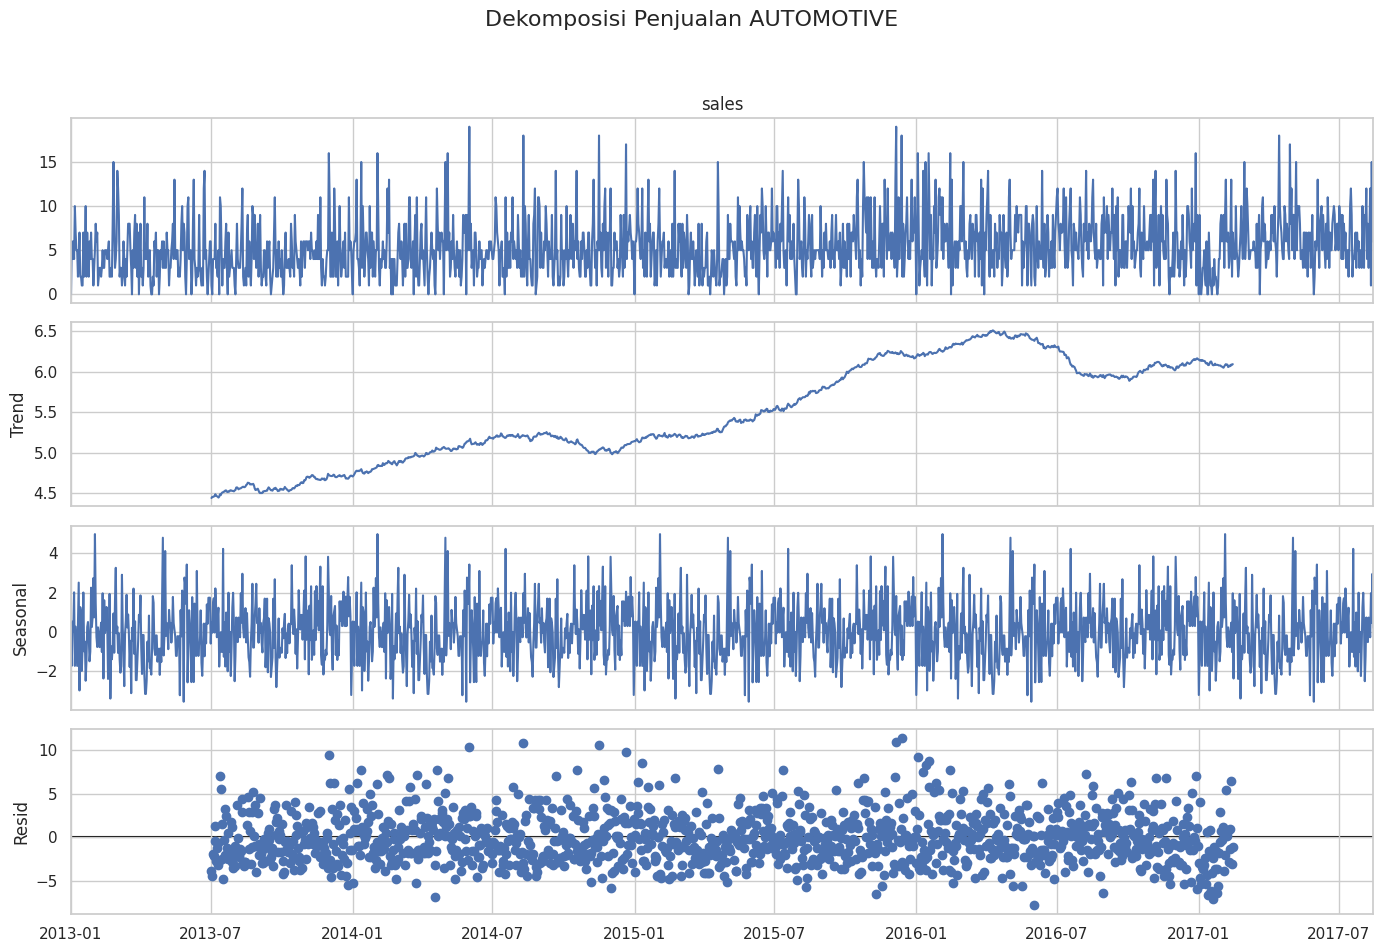

In [ ]:
# Yearly
result = seasonal_decompose(auto_sales, model='additive', period=365)

# Plotting
fig = result.plot()
fig.set_size_inches(14, 10)
fig.suptitle('Dekomposisi Penjualan AUTOMOTIVE', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<Axes: xlabel='date'>

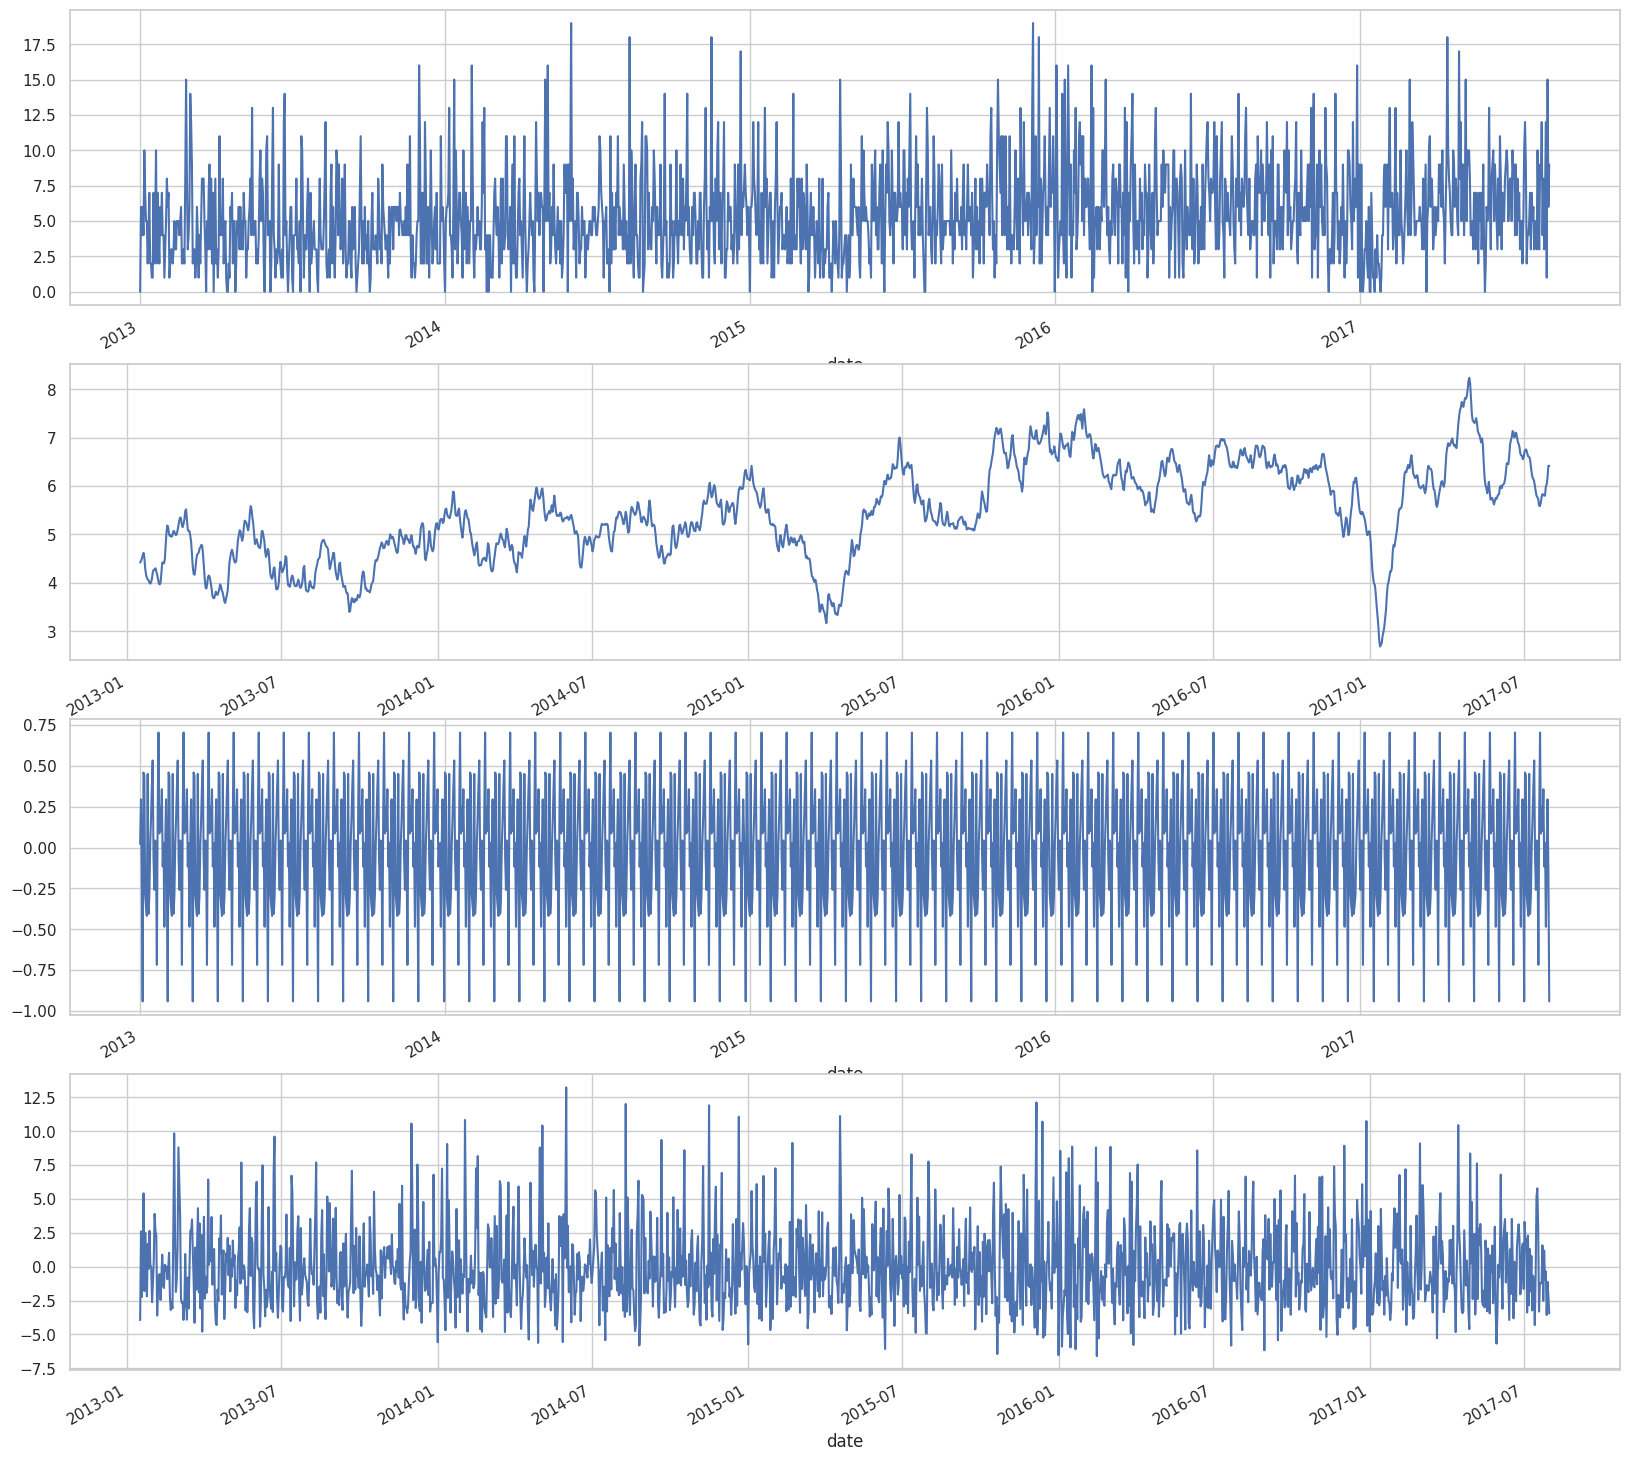

In [ ]:
#Monthly
plot_decompose = seasonal_decompose(auto_sales, model='additive', period=30)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

<Axes: xlabel='date'>

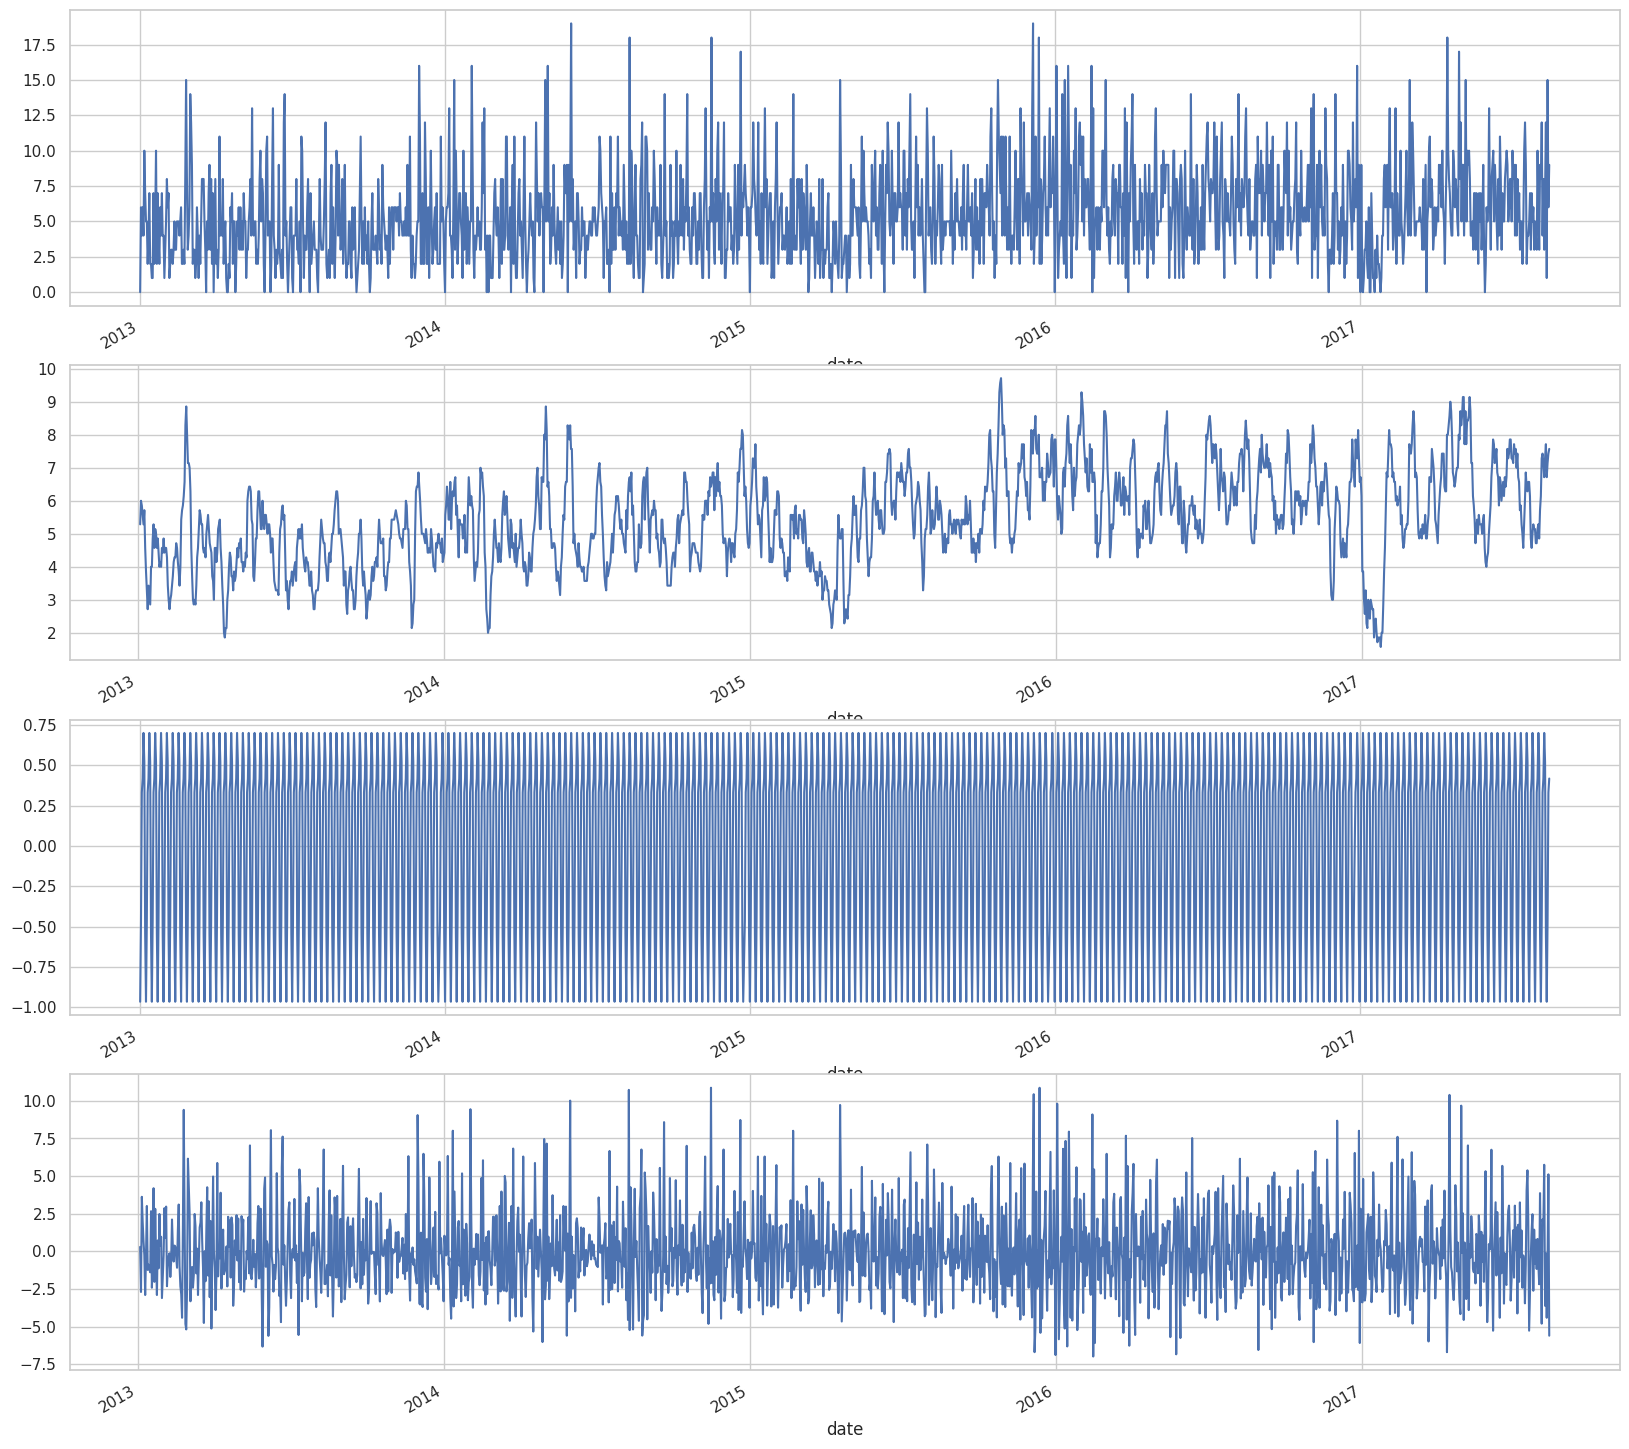

In [ ]:
#Weekly
plot_decompose = seasonal_decompose(auto_sales, model='additive', period=7)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

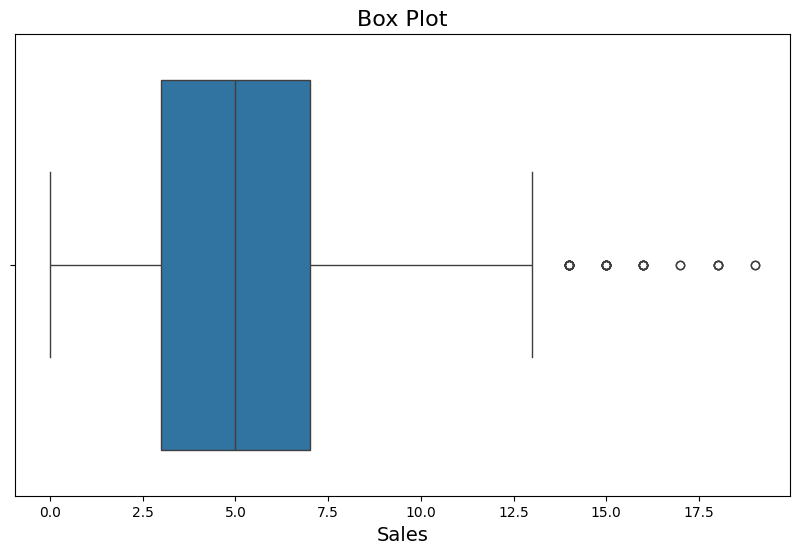

In [ ]:
# Deteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=auto_sales)
plt.title('Box Plot', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.show()

#####**ACF/PACF**

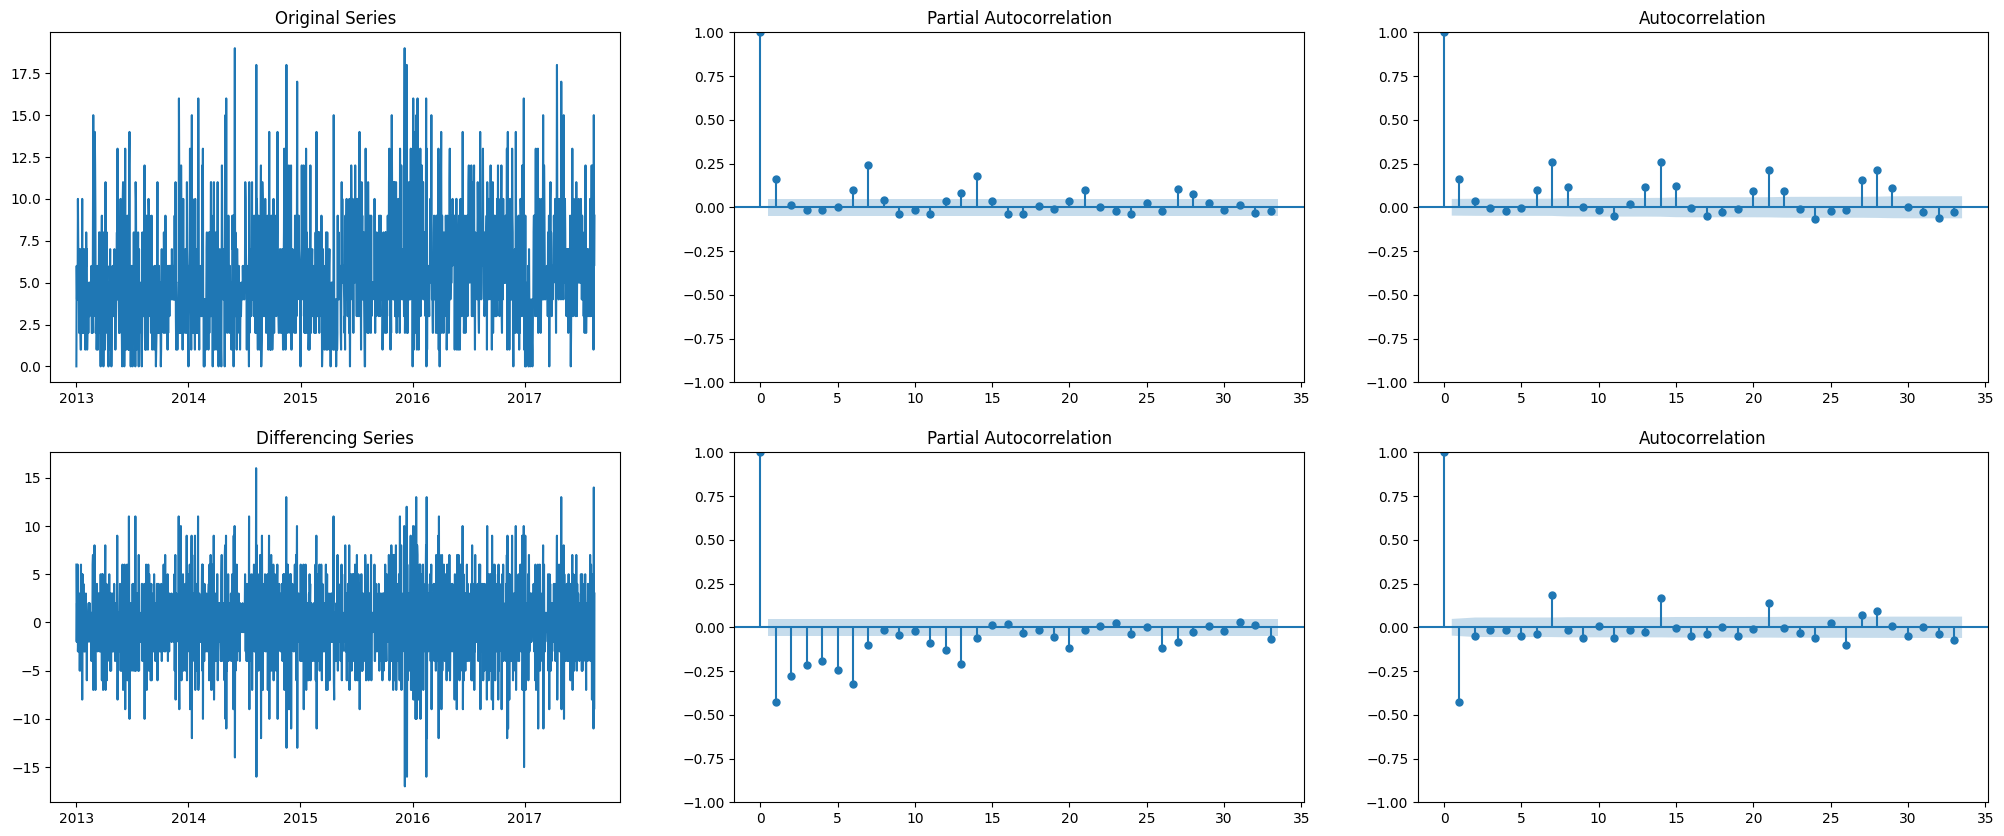

In [ ]:
# Plot ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(auto_sales)
ax[0, 1] = plot_pacf(auto_sales, ax=ax[0, 1])
ax[0, 2] = plot_acf(auto_sales, ax=ax[0, 2])

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(auto_sales.diff().dropna())
ax[1, 1] = plot_pacf(auto_sales.diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(auto_sales.diff().dropna(), ax=ax[1, 2])

plt.show()

#####**Stationarity checking 1**

In [ ]:
# ADF
from statsmodels.tsa.stattools import adfuller

auto_adf = adfuller(auto_sales)

print(f'ADF statistics: %f' %auto_adf[0])
print(f'p-value: %f' %auto_adf[1])
print(f'critical values: 1%: {auto_adf[4]["1%"]}, 5%: {auto_adf[4]["5%"]}, 10%: {auto_adf[4]["10%"]}')


# [0] = ADF statistics --> harus lebih rendah dari critical value
# [1] = p-value --> nilai kemaknaan
# [4] = critical value 1%, 5%, 10%

ADF statistics: -5.662511
p-value: 0.000001
critical values: 1%: -3.434288317816291, 5%: -2.863279543282764, 10%: -2.5676960908695463


In [ ]:
# KPSS
import pandas as pd
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'  {key} : {value}')

    print('Conclusion:')
    # Interpretasi
    if p_value < 0.05:
        print('Evidence suggests the time series is not stationary.')
    else:
        print('Evidence suggests the time series is stationary.')

kpss_test(auto_sales, regression='c')  # 'c' for constant-only trend, 'ct' for constant and trend


KPSS Statistic: 5.564586456133851
p-value: 0.01
Num Lags: 4
Critial Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
Conclusion:
Evidence suggests the time series is not stationary.


<ipython-input-11-bcf0cb46a068>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


#####**Differencing 1**

In [23]:
auto_sales_diff1 = auto_sales.diff().dropna()

#####**Re-dekomposisi**

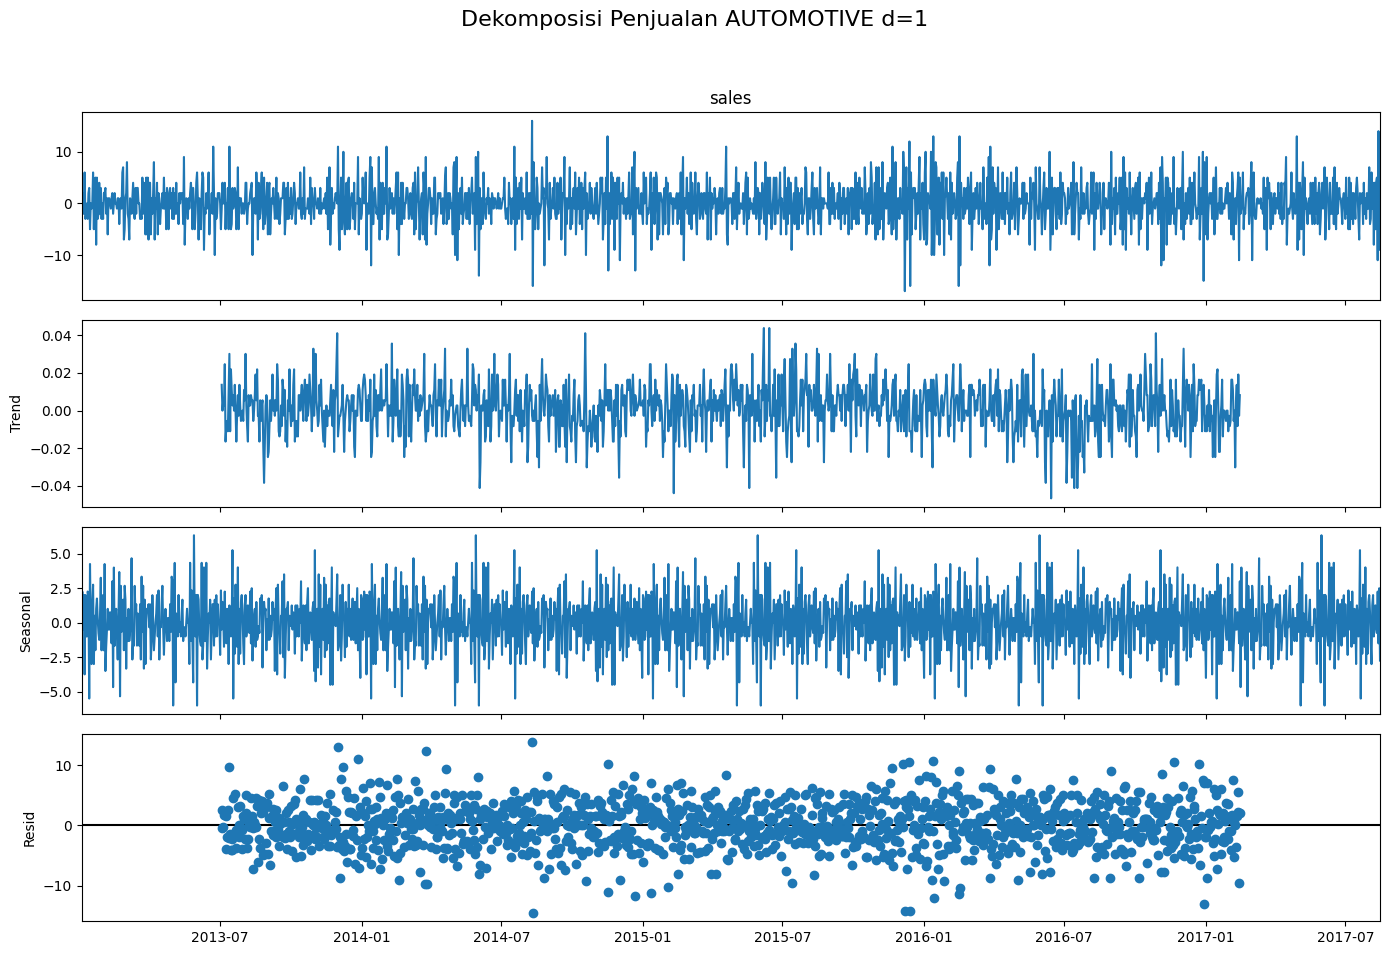

In [ ]:
# Yearly
result = seasonal_decompose(auto_sales_diff1, model='additive', period=365)

# Plotting
fig = result.plot()
fig.set_size_inches(14, 10)
fig.suptitle('Dekomposisi Penjualan AUTOMOTIVE d=1', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#####**Stationary checking 2**

In [ ]:
auto_adf_diff1 = adfuller(auto_sales_diff1)

print(f'ADF statistics: %f' %auto_adf_diff1[0])
print(f'p-value: %f' %auto_adf_diff1[1])
print(f'critical values: 1%: {auto_adf_diff1[4]["1%"]}, 5%: {auto_adf_diff1[4]["5%"]}, 10%: {auto_adf_diff1[4]["10%"]}')

ADF statistics: -13.271013
p-value: 0.000000
critical values: 1%: -3.4343026006557427, 5%: -2.863285847799246, 10%: -2.5676994479374455


In [ ]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)

    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'  {key} : {value}')

    print('Conclusion:')

    if p_value < 0.05:
        print('Evidence suggests the time series is not stationary.')
    else:
        print('Evidence suggests the time series is stationary.')

kpss_test(auto_sales_diff1, regression='c')

KPSS Statistic: 0.03506463158303882
p-value: 0.1
Num Lags: 82
Critical Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
Conclusion:
Evidence suggests the time series is stationary.


<ipython-input-27-a36b2c9cba2b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


#####**Modeling ARIMA**

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera

######**No Differencing**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

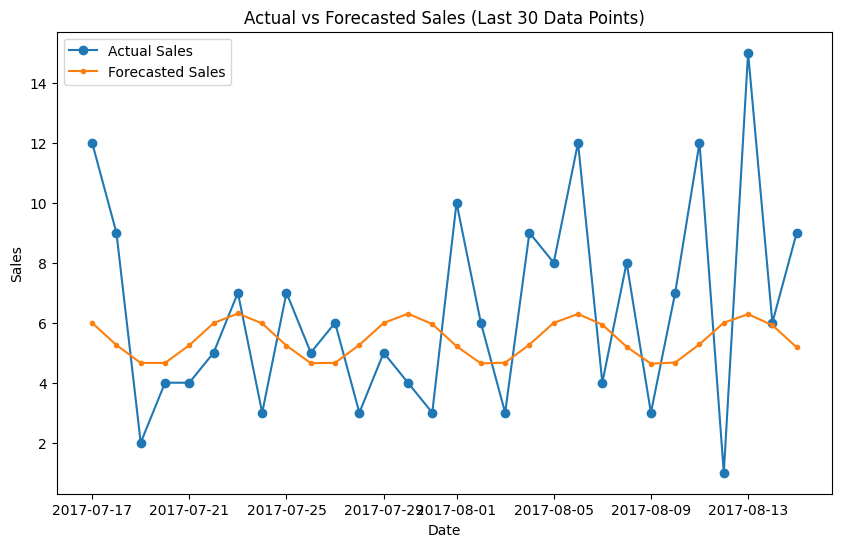

Ljung-Box:      lb_stat  lb_pvalue
7  21.217749   0.003461
Jarque-Bera: SignificanceResult(statistic=209.04042398298589, pvalue=4.049940891145945e-46)
AIC: 6758.367807857014
BIC: 6836.452335503169
Log-Likelihood: -3364.183903928507
MSE: 10.255330733172642
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1347
Model:                 ARIMA(7, 0, 6)   Log Likelihood               -3364.184
Date:                Mon, 18 Mar 2024   AIC                           6758.368
Time:                        08:37:06   BIC                           6836.452
Sample:                             0   HQIC                          6787.614
                               - 1347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

In [22]:
# Splitting
train, test = auto_sales[:int(len(auto_sales) * 0.8)], auto_sales[int(len(auto_sales) * 0.8):]

# Fitting
model = ARIMA(train, order=(7, 0, 6)).fit()

# Forecasting
forecast = model.forecast(steps=len(test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test.index[-30:], test[-30:], 'o-', label='Actual Sales')
plt.plot(test.index[-30:], forecast[-30:], '.-', label='Forecasted Sales')
plt.legend()
plt.title('Actual vs Forecasted Sales (Last 30 Data Points)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Diagnostik
ljb = acorr_ljungbox(model.resid, lags=[7], return_df=True)
jb = jarque_bera(model.resid)
aic, bic, llhood = model.aic, model.bic, model.llf
mse_arima = mean_squared_error(test, forecast)

print(f'Ljung-Box: {ljb}')
print(f'Jarque-Bera: {jb}')
print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f'Log-Likelihood: {llhood}')
print(f'MSE: {mse_arima}')

# Print
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

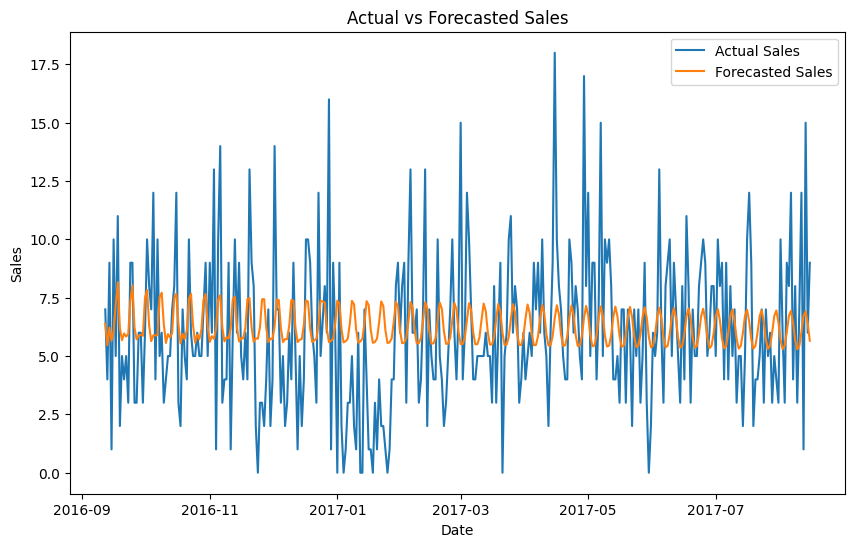

Ljung-Box:     lb_stat  lb_pvalue
7  5.327005   0.620124
Jarque-Bera: SignificanceResult(statistic=180.43423750466457, pvalue=6.5948231327831115e-40)
AIC 6718.12463569321
BIC 6801.414798515775
log-likelihood -3343.062317846605
MSE 9.907612078297259
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1347
Model:                 ARIMA(7, 0, 7)   Log Likelihood               -3343.062
Date:                Thu, 14 Mar 2024   AIC                           6718.125
Time:                        00:43:15   BIC                           6801.415
Sample:                             0   HQIC                          6749.320
                               - 1347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

In [ ]:
# Splitting
train_size = int(len(auto_sales) * 0.8)
train, test = auto_sales[:train_size], auto_sales[train_size:]

# Fitting
model = ARIMA(train, order=(7, 0, 7))
model_arima_auto02 = model.fit()

# Forecasting
forecast = model_arima_auto02.forecast(steps=len(test)) # durasi sama dengan data test

# Membandingkan forecasted vs aktual
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, forecast, label='Forecasted Sales')
plt.legend()
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Diagnostik
ljb = acorr_ljungbox(model_arima_auto02.resid, lags=[7], return_df=True)
jb = jarque_bera(model_arima_auto02.resid)
aic = model_arima_auto02.aic
bic = model_arima_auto02.bic
llhood = model_arima_auto02.llf
mse_arima = mean_squared_error(test, forecast)

print(f'Ljung-Box: {ljb}')
print(f'Jarque-Bera: {jb}')
print(f'AIC {aic}')
print(f'BIC {bic}')
print(f'log-likelihood {llhood}')
print(f'MSE {mse_arima}')

print(model_arima_auto02.summary())

######**1st Order Differencing Models**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

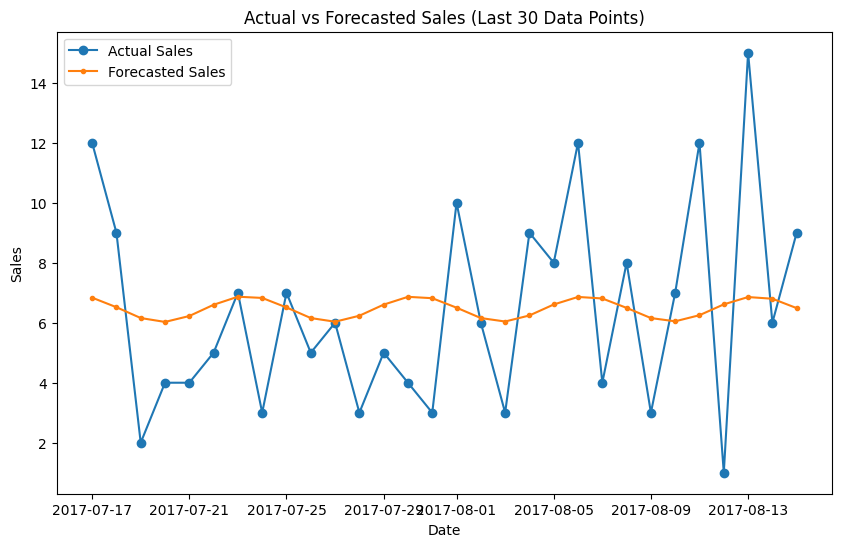

Ljung-Box:      lb_stat  lb_pvalue
7  14.487925   0.043153
Jarque-Bera: SignificanceResult(statistic=220.65650604792444, pvalue=1.2163218645387719e-48)
AIC: 6758.045436469844
BIC: 6830.91393161271
Log-Likelihood: -3365.022718234922
MSE: 10.391641234512148
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1347
Model:                 ARIMA(7, 1, 6)   Log Likelihood               -3365.023
Date:                Mon, 18 Mar 2024   AIC                           6758.045
Time:                        09:38:16   BIC                           6830.914
Sample:                             0   HQIC                          6785.339
                               - 1347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

In [41]:
# Splitting
train, test = auto_sales[:int(len(auto_sales) * 0.8)], auto_sales[int(len(auto_sales) * 0.8):]

# Fitting
model = ARIMA(train, order=(7, 1, 6)).fit()

# Forecasting
forecast = model.forecast(steps=len(test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test.index[-30:], test[-30:], 'o-', label='Actual Sales')
plt.plot(test.index[-30:], forecast[-30:], '.-', label='Forecasted Sales')
plt.legend()
plt.title('Actual vs Forecasted Sales (Last 30 Data Points)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Diagnostik
ljb = acorr_ljungbox(model.resid, lags=[7], return_df=True)
jb = jarque_bera(model.resid)
aic, bic, llhood = model.aic, model.bic, model.llf
mse_arima = mean_squared_error(test, forecast)

print(f'Ljung-Box: {ljb}')
print(f'Jarque-Bera: {jb}')
print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f'Log-Likelihood: {llhood}')
print(f'MSE: {mse_arima}')

# Print
print(model.summary())

#####**Modeling SARIMA**

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

######**No Differencing**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/s

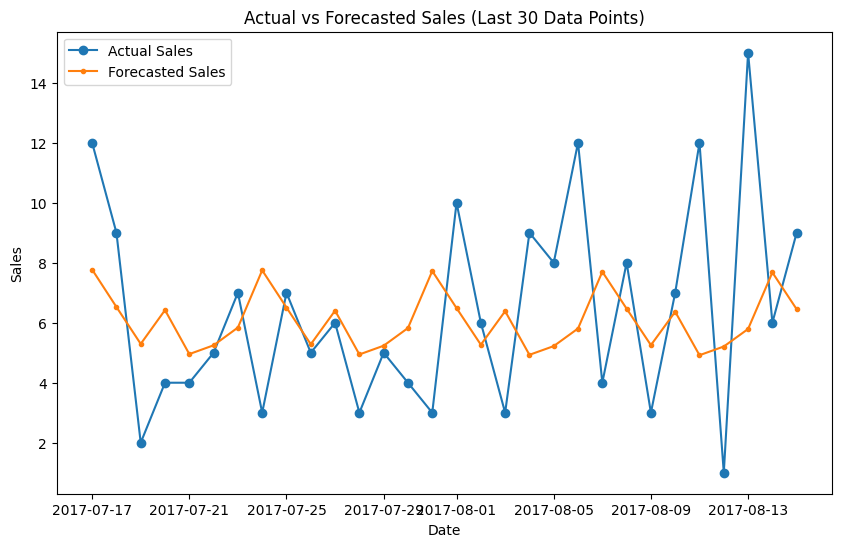

Ljung-Box:      lb_stat  lb_pvalue
7  23.550757   0.001366
Jarque-Bera: SignificanceResult(statistic=207.3810304259546, pvalue=9.284989507437164e-46)
AIC: 6777.74947600562
BIC: 6850.607566094123
Log-Likelihood: -3374.87473800281
MSE: 11.407775418628068
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1346
Model:                 ARIMA(6, 1, 7)   Log Likelihood               -3374.875
Date:                Mon, 18 Mar 2024   AIC                           6777.749
Time:                        08:50:59   BIC                           6850.608
Sample:                             0   HQIC                          6805.040
                               - 1346                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [27]:
# Splitting
train, test = auto_sales[:int(len(auto_sales) * 0.8)], auto_sales[int(len(auto_sales) * 0.8):]

# Creating and fitting
model_sarima = SARIMAX(train,
                       order=(1, 0, 1),             # Non-seasonal parameters
                       seasonal_order=(7, 0, 1, 7)  # Seasonal parameters (P, D, Q, s)
                      ).fit()

# Forecasting
forecast = model_sarima.forecast(steps=len(test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test.index[-30:], test[-30:], 'o-', label='Actual Sales')
plt.plot(test.index[-30:], forecast[-30:], '.-', label='Forecasted Sales')
plt.legend()
plt.title('Actual vs Forecasted Sales (Last 30 Data Points)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Diagnostik
ljb = acorr_ljungbox(model.resid, lags=[7], return_df=True)
jb = jarque_bera(model.resid)
aic, bic, llhood = model.aic, model.bic, model.llf
mse_arima = mean_squared_error(test, forecast)

print(f'Ljung-Box: {ljb}')
print(f'Jarque-Bera: {jb}')
print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f'Log-Likelihood: {llhood}')
print(f'MSE: {mse_arima}')

# Print
print(model.summary())

######**1st Order Differencing Models**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

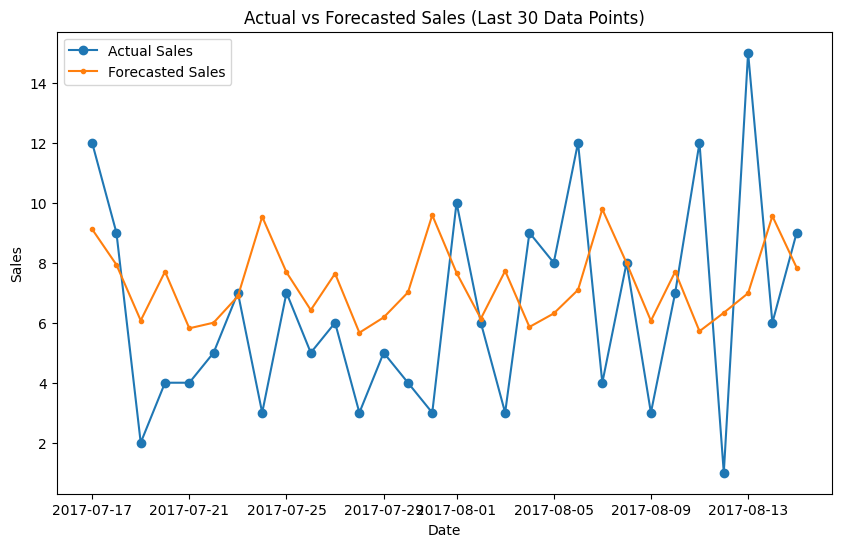

Ljung-Box:      lb_stat  lb_pvalue
7  14.487925   0.043153
Jarque-Bera: SignificanceResult(statistic=220.65650604792444, pvalue=1.2163218645387719e-48)
AIC: 6758.045436469844
BIC: 6830.91393161271
Log-Likelihood: -3365.022718234922
MSE: 12.437273323336786
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1347
Model:                 ARIMA(7, 1, 6)   Log Likelihood               -3365.023
Date:                Mon, 18 Mar 2024   AIC                           6758.045
Time:                        09:41:45   BIC                           6830.914
Sample:                             0   HQIC                          6785.339
                               - 1347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

In [42]:
# Splitting
train, test = auto_sales[:int(len(auto_sales) * 0.8)], auto_sales[int(len(auto_sales) * 0.8):]

# Pembuatan model and fitting
model_sarima = SARIMAX(train,
                       order=(1, 1, 1),             # Non-seasonal parameters
                       seasonal_order=(5, 1, 7, 7)  # Seasonal parameters (P, D, Q, s)
                      ).fit()

# Forecasting
forecast = model_sarima.forecast(steps=len(test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test.index[-30:], test[-30:], 'o-', label='Actual Sales')
plt.plot(test.index[-30:], forecast[-30:], '.-', label='Forecasted Sales')
plt.legend()
plt.title('Actual vs Forecasted Sales (Last 30 Data Points)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Diagnostik
ljb = acorr_ljungbox(model.resid, lags=[7], return_df=True)
jb = jarque_bera(model.resid)
aic, bic, llhood = model.aic, model.bic, model.llf
mse_arima = mean_squared_error(test, forecast)

print(f'Ljung-Box: {ljb}')
print(f'Jarque-Bera: {jb}')
print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f'Log-Likelihood: {llhood}')
print(f'MSE: {mse_arima}')

# Print
print(model.summary())

#####**Modeling SARIMAX**

######**Stationary Checking Data Oil**

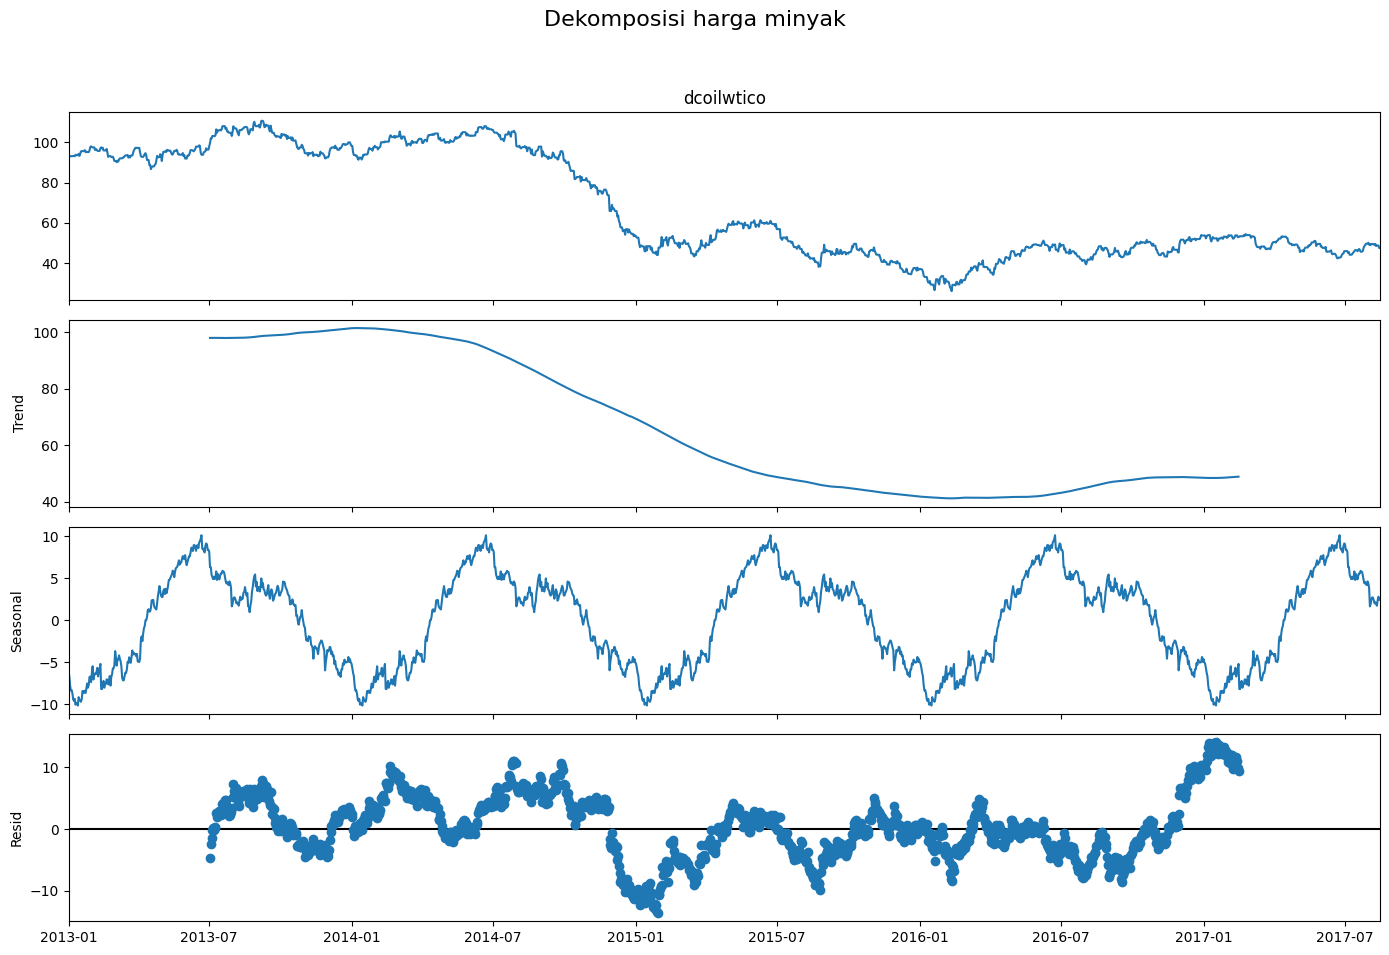

In [ ]:
# Yearly
result = seasonal_decompose(auto['dcoilwtico'], model='additive', period=365)

# Plotting
fig = result.plot()
fig.set_size_inches(14, 10)
fig.suptitle('Dekomposisi harga minyak', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
# ADF
from statsmodels.tsa.stattools import adfuller

oil_adf = adfuller(auto['dcoilwtico'])

print(f'ADF statistics: %f' %oil_adf[0])
print(f'p-value: %f' %oil_adf[1])
print(f'critical values: 1%: {oil_adf[4]["1%"]}, 5%: {oil_adf[4]["5%"]}, 10%: {oil_adf[4]["10%"]}')


# [0] = ADF statistics --> harus lebih rendah dari critical value
# [1] = p-value --> nilai kemaknaan
# [4] = critical value 1%, 5%, 10%

ADF statistics: -0.879185
p-value: 0.794750
critical values: 1%: -3.434243762106336, 5%: -2.863259875977509, 10%: -2.567685618332742


In [ ]:
# KPSS
import pandas as pd
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Output the test results
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'  {key} : {value}')

    print('Conclusion:')
    # Interpretation
    if p_value < 0.05:
        print('Evidence suggests the time series is not stationary.')
    else:
        print('Evidence suggests the time series is stationary.')

kpss_test(auto['dcoilwtico'], regression='c')  # 'c' for constant-only trend, 'ct' for constant and trend

KPSS Statistic: 5.063232436812116
p-value: 0.01
Num Lags: 26
Critial Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
Conclusion:
Evidence suggests the time series is not stationary.


<ipython-input-56-a0f698dd0ccf>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


######**Stationary cheking data promotion**

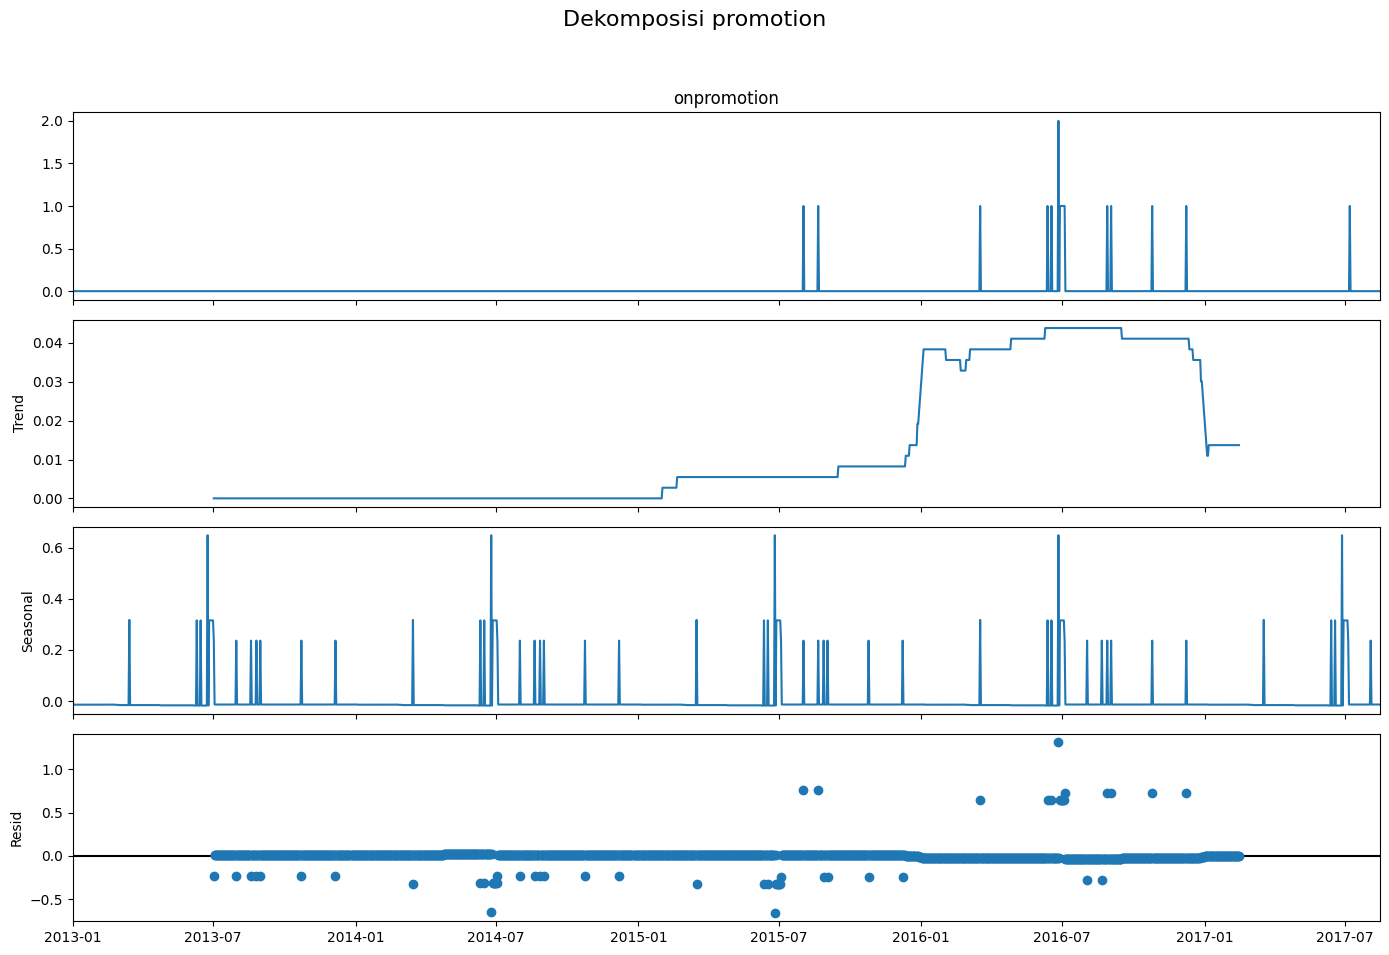

In [ ]:
# Yearly
result = seasonal_decompose(auto['onpromotion'], model='additive', period=365)

# Plotting
fig = result.plot()
fig.set_size_inches(14, 10)
fig.suptitle('Dekomposisi promotion', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
# ADF
from statsmodels.tsa.stattools import adfuller

promotion_adf = adfuller(auto['onpromotion'])

print(f'ADF statistics: %f' %promotion_adf[0])
print(f'p-value: %f' %promotion_adf[1])
print(f'critical values: 1%: {promotion_adf[4]["1%"]}, 5%: {promotion_adf[4]["5%"]}, 10%: {promotion_adf[4]["10%"]}')


# [0] = ADF statistics --> harus lebih rendah dari critical value
# [1] = p-value --> nilai kemaknaan
# [4] = critical value 1%, 5%, 10%

ADF statistics: -7.680566
p-value: 0.000000
critical values: 1%: -3.4342717844184696, 5%: -2.8632722453211117, 10%: -2.567692204811933


In [ ]:
# KPSS
import pandas as pd
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Output the test results
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Num Lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'  {key} : {value}')

    print('Conclusion:')
    # Interpretation
    if p_value < 0.05:
        print('Evidence suggests the time series is not stationary.')
    else:
        print('Evidence suggests the time series is stationary.')

kpss_test(auto['onpromotion'], regression='c')  # 'c' for constant-only trend, 'ct' for constant and trend

KPSS Statistic: 0.45852497276426846
p-value: 0.051928891049884296
Num Lags: 22
Critial Values:
  10% : 0.347
  5% : 0.463
  2.5% : 0.574
  1% : 0.739
Conclusion:
Evidence suggests the time series is stationary.


######**Differencing Data Oil**

In [45]:
exog_data1 = auto['dcoilwtico']
exog_data1_diff1 = exog_data1.diff().dropna()
exog_data1_diff1 = exog_data1_diff1.to_frame()

In [47]:
exog_data1_diff2 = exog_data1_diff1.diff().dropna()

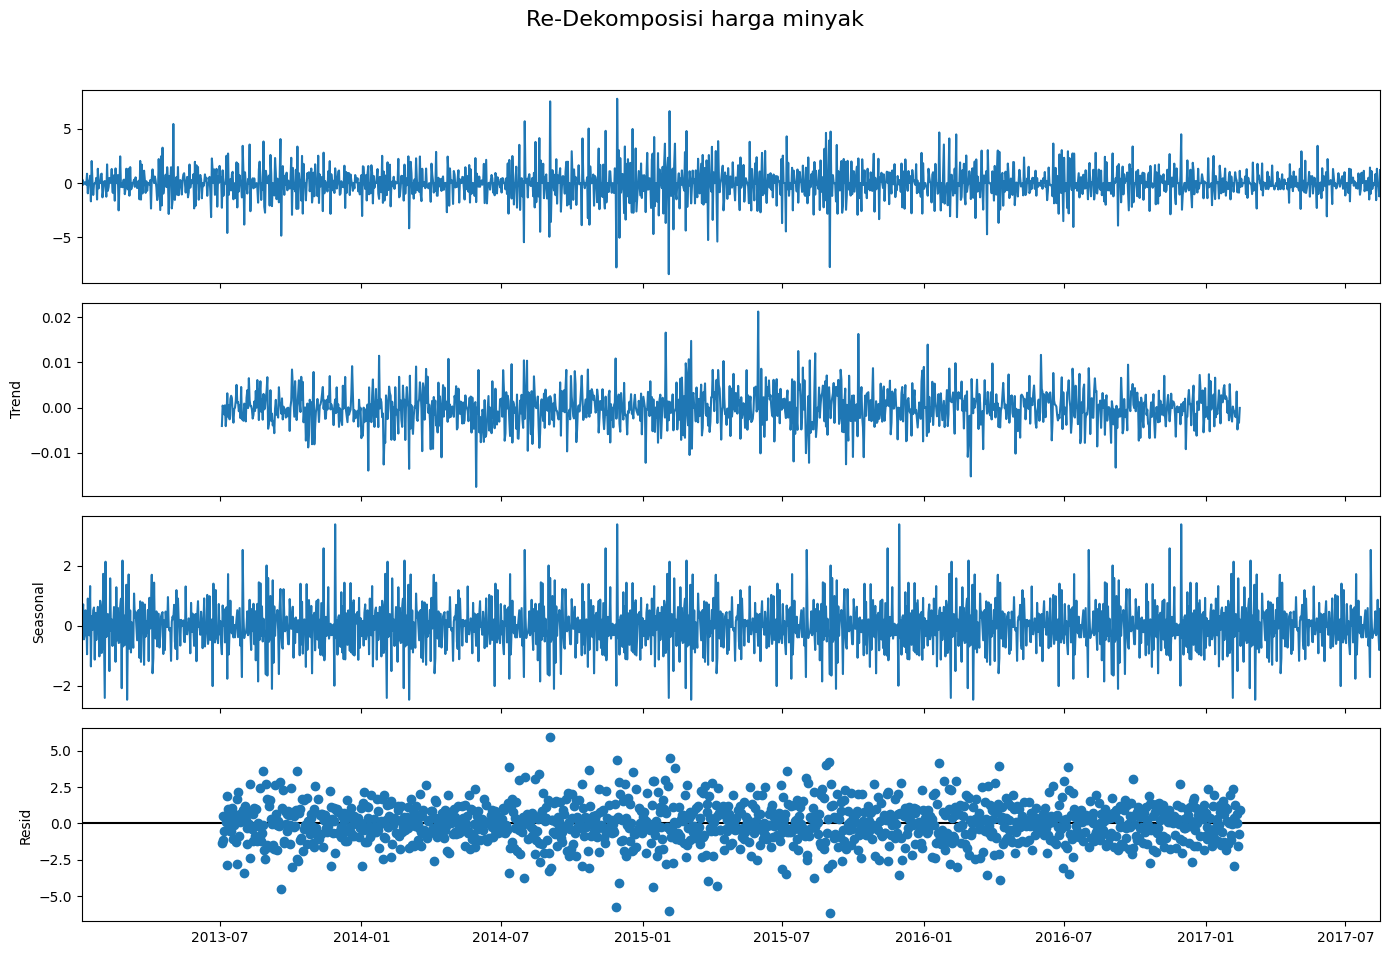

In [48]:
# Yearly
result = seasonal_decompose(exog_data1_diff2, model='additive', period=365)

# Plotting
fig = result.plot()
fig.set_size_inches(14, 10)
fig.suptitle('Re-Dekomposisi harga minyak', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

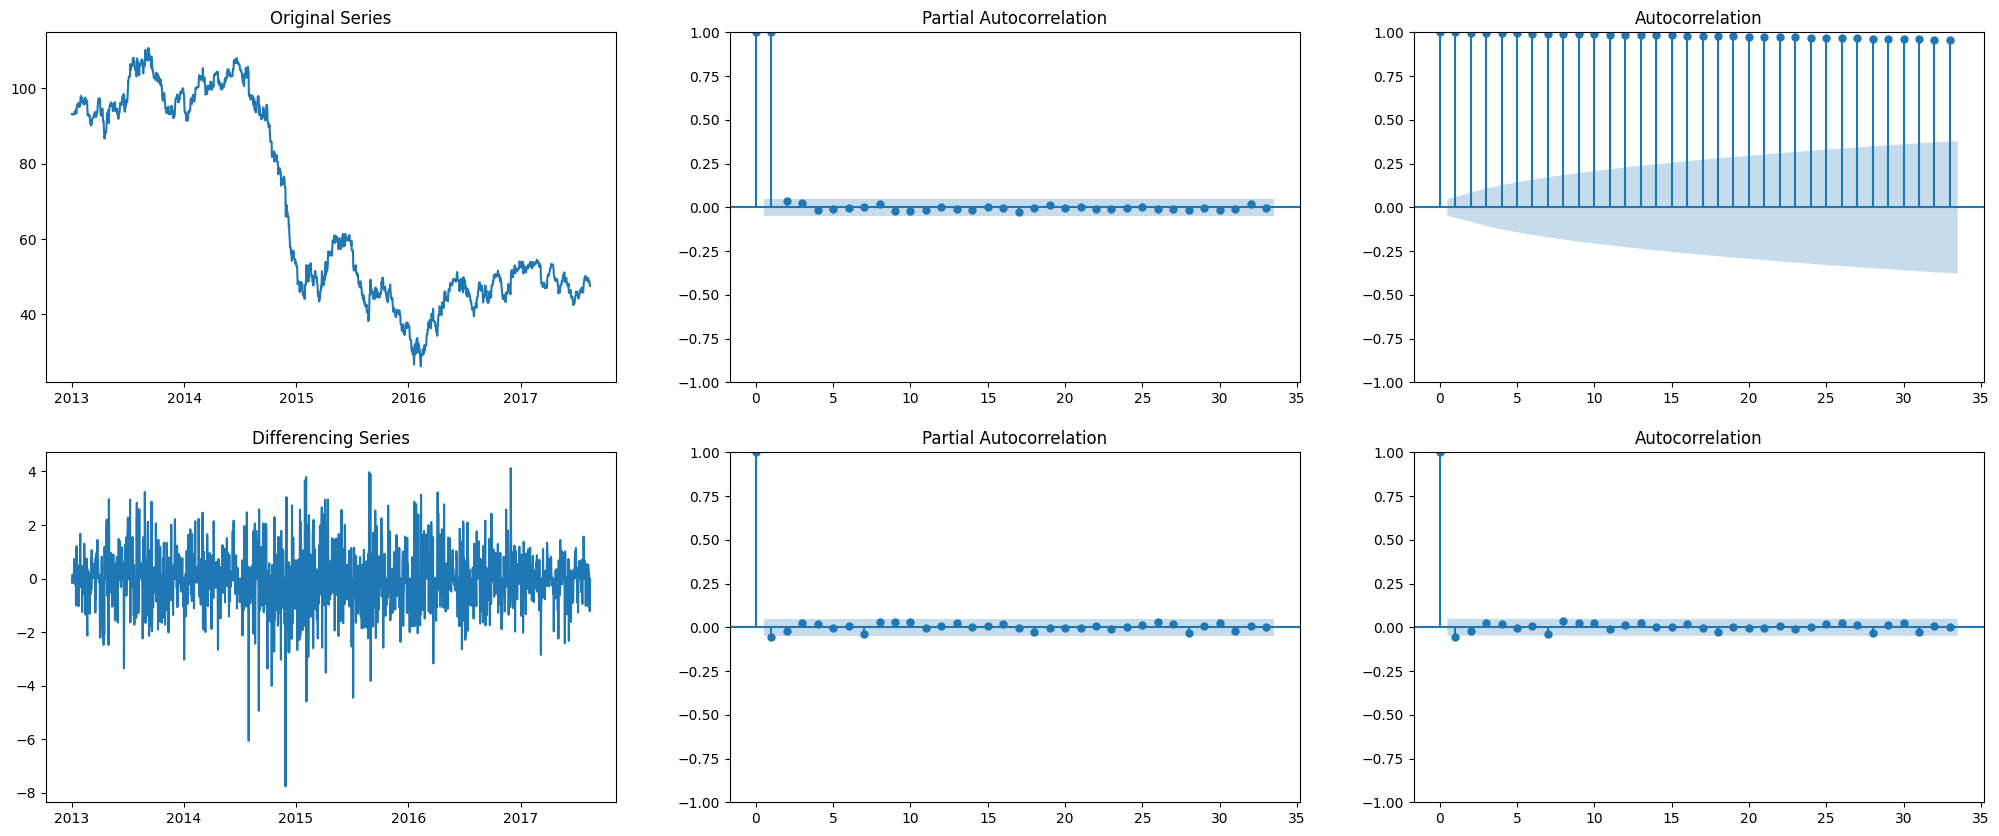

In [50]:
# Plot ACF dan PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(exog_data1)
ax[0, 1] = plot_pacf(exog_data1, ax=ax[0, 1])
ax[0, 2] = plot_acf(exog_data1, ax=ax[0, 2])

ax[1, 0].set_title('Differencing Series')
ax[1, 0].plot(exog_data1.diff().dropna())
ax[1, 1] = plot_pacf(exog_data1.diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_acf(exog_data1.diff().dropna(), ax=ax[1, 2])

plt.show()

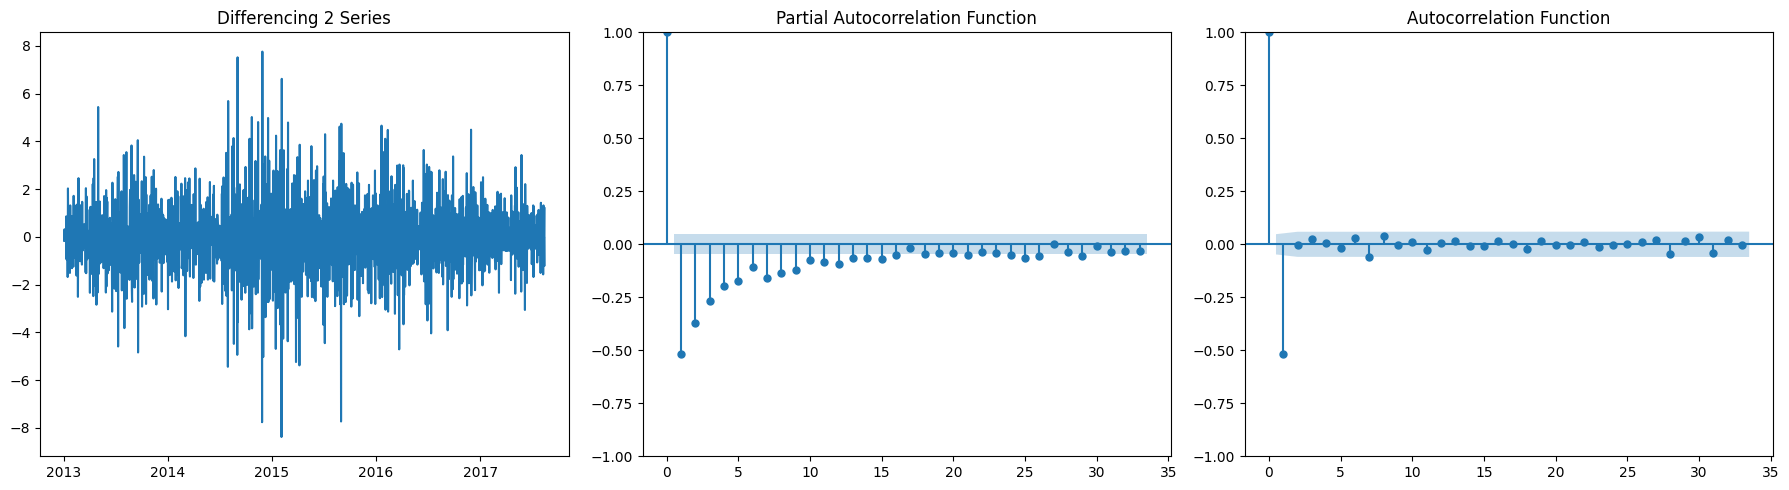

In [52]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming exog_data1_diff1 is defined and is a pandas Series or DataFrame column

# Preparing the figure and axes
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # Adjust the figure size as needed

# Plotting on the first subplot
ax[0].set_title('Differencing 2 Series')
ax[0].plot(exog_data1_diff1.diff().dropna())

# Plotting PACF on the second subplot
plot_pacf(exog_data1_diff1.diff().dropna(), ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function')

# Plotting ACF on the third subplot
plot_acf(exog_data1_diff1.diff().dropna(), ax=ax[2])
ax[2].set_title('Autocorrelation Function')

plt.tight_layout()  # Adjust layout to make room for the titles
plt.show()


######**1 Data Eksogen (dcoilwtico)**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

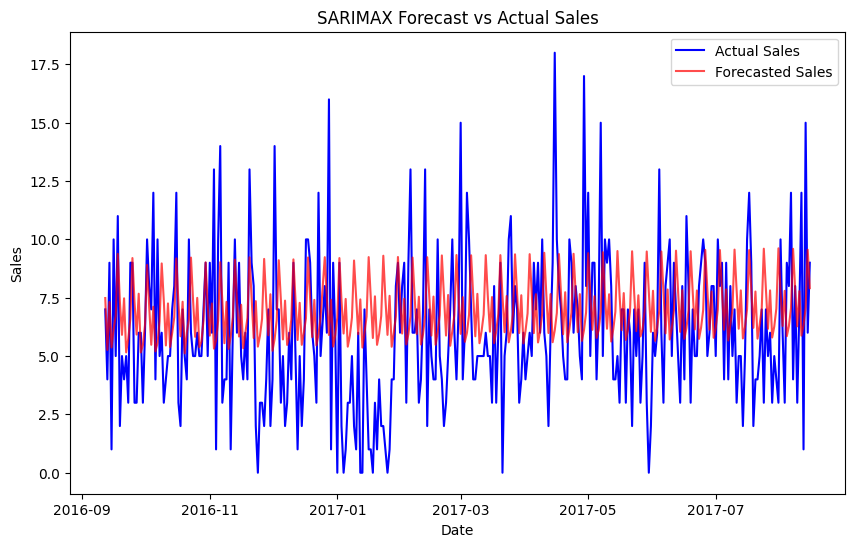

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Splitting
auto_sales_aligned = auto_sales[2:]
split_point_aligned = int(len(auto_sales_aligned) * 0.8)
auto_sales_train = auto_sales_aligned[:split_point_aligned]
auto_sales_test = auto_sales_aligned[split_point_aligned:]
exog_data_train = exog_data1_diff2[:split_point_aligned]
exog_data_test = exog_data1_diff2[split_point_aligned:]

# Modeling
model = SARIMAX(auto_sales_train,
                exog=exog_data_train,
                order=(1, 1, 1),
                seasonal_order=(5, 1, 7, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecasting
forecast_steps = len(auto_sales_test)
forecast = results.get_forecast(steps=forecast_steps, exog=exog_data_test)

# Extract the forecasted mean values
forecast_mean = forecast.predicted_mean

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(auto_sales_test.index, auto_sales_test, label='Actual Sales', color='blue')
plt.plot(auto_sales_test.index, forecast_mean, label='Forecasted Sales', color='red', alpha=0.7)
plt.legend()
plt.title('SARIMAX Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


######**1 Data Eksogen (onpromotion)**

In [56]:
exog_data2 = auto['onpromotion']
exog_data2 = exog_data2.to_frame()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

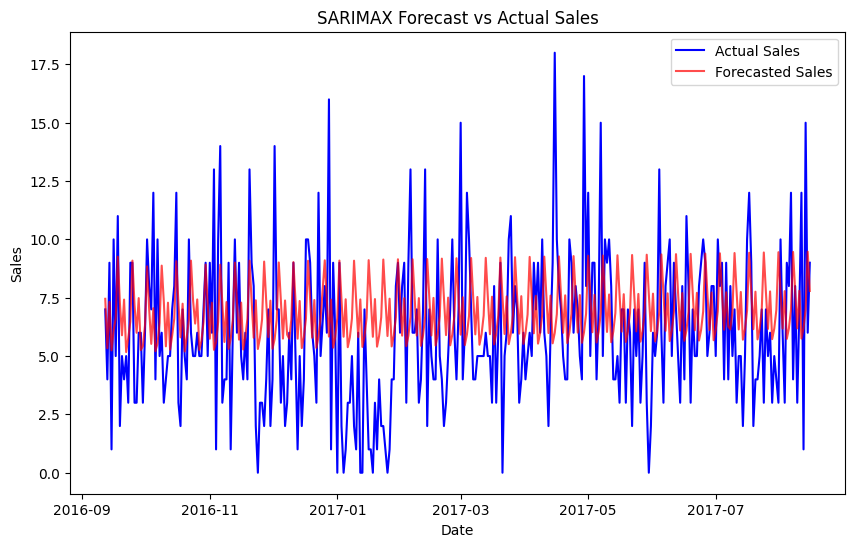

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Splitting
split_point_aligned = int(len(auto_sales) * 0.8)
auto_sales_train = auto_sales[:split_point_aligned]
auto_sales_test = auto_sales[split_point_aligned:]
exog_data_train = exog_data2[:split_point_aligned]
exog_data_test = exog_data2[split_point_aligned:]

# Modeling
model = SARIMAX(auto_sales_train,
                exog=exog_data_train,
                order=(1, 1, 1),
                seasonal_order=(5, 1, 7, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecasting
forecast_steps = len(auto_sales_test)
forecast = results.get_forecast(steps=forecast_steps, exog=exog_data_test)

# Extract the forecasted mean values
forecast_mean = forecast.predicted_mean

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(auto_sales_test.index, auto_sales_test, label='Actual Sales', color='blue')
plt.plot(auto_sales_test.index, forecast_mean, label='Forecasted Sales', color='red', alpha=0.7)
plt.legend()
plt.title('SARIMAX Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

######**2 Data Eksogen (dcoilwtico & onpromotion)**

In [58]:
exog_data3 = exog_data1_diff2.join(exog_data2, how='inner')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

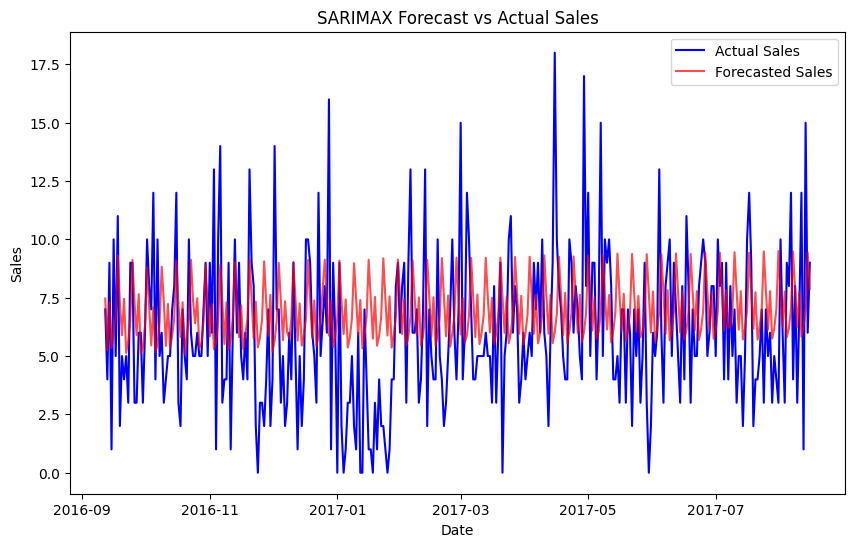

Ljung-Box: 
    lb_stat  lb_pvalue
7  5.449604   0.605269

Jarque-Bera: SignificanceResult(statistic=126.05689569798757, pvalue=4.237335936214388e-28)

AIC: 6446.440206139397
BIC: 6534.148168520956
Log-Likelihood: -3206.2201030696983
MSE: 12.275815450160794
                                               SARIMAX Results                                               
Dep. Variable:                                                 sales   No. Observations:                 1345
Model:             SARIMAX(1, 1, 1)x(5, 1, [1, 2, 3, 4, 5, 6, 7], 7)   Log Likelihood               -3206.220
Date:                                               Mon, 18 Mar 2024   AIC                           6446.440
Time:                                                       10:40:22   BIC                           6534.148
Sample:                                                            0   HQIC                          6479.366
                                                              - 1345              

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Splitting
auto_sales_aligned = auto_sales[2:]
split_point_aligned = int(len(auto_sales_aligned) * 0.8)
auto_sales_train = auto_sales_aligned[:split_point_aligned]
auto_sales_test = auto_sales_aligned[split_point_aligned:]
exog_data_train = exog_data3[:split_point_aligned]
exog_data_test = exog_data3[split_point_aligned:]

# Modeling
model = SARIMAX(auto_sales_train,
                exog=exog_data_train,
                order=(1, 1, 1),
                seasonal_order=(5, 1, 7, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecasting
forecast_steps = len(auto_sales_test)
forecast = results.get_forecast(steps=forecast_steps, exog=exog_data_test)

# Extract the forecasted mean values
forecast_mean = forecast.predicted_mean

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(auto_sales_test.index, auto_sales_test, label='Actual Sales', color='blue')
plt.plot(auto_sales_test.index, forecast_mean, label='Forecasted Sales', color='red', alpha=0.7)
plt.legend()
plt.title('SARIMAX Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Diagnostik
ljb = acorr_ljungbox(results.resid, lags=[7], return_df=True)
jb = jarque_bera(results.resid)
aic, bic, llhood = results.aic, results.bic, results.llf
mse_arima = mean_squared_error(auto_sales_test, forecast_mean)

print(f'Ljung-Box: \n{ljb}\n')
print(f'Jarque-Bera: {jb}\n')
print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f'Log-Likelihood: {llhood}')
print(f'MSE: {mse_arima}')

# Print model summary
print(results.summary())

#####**Modeling LSTM** (Belum Selesai)

In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Outlier detection and capping
Q1, Q3 = auto['sales'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outlier_thresholds = {'low': Q1 - 1.5 * IQR, 'high': Q3 + 1.5 * IQR}
auto['sales'] = auto['sales'].clip(lower=outlier_thresholds['low'], upper=outlier_thresholds['high'])

# Feature scaling
scaler = MinMaxScaler()
features_to_scale = ['sales', 'dcoilwtico', 'onpromotion']
auto[features_to_scale] = scaler.fit_transform(auto[features_to_scale])

# Preparing sequences for LSTM
def create_sequences(df, feature_cols, target_col, sequence_length, test_size):
    data = df[feature_cols + [target_col]].values
    num_features = data.shape[1]

    sequences = [data[i: i + sequence_length] for i in range(len(data) - sequence_length)]
    sequences = np.array(sequences)

    X = sequences[:, :-1, :]
    y = sequences[:, -1, -1]

    # Split into training and testing sets
    train_size = int(len(X) * (1 - test_size))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    return X_train, y_train, X_test, y_test

# Specify columns and parameters for LSTM data preparation
feature_columns = ['onpromotion', 'dcoilwtico']
target_column = 'sales'
sequence_length = 7
test_size = 0.2

# Generate sequences and split the data
X_train, y_train, X_test, y_test = create_sequences(auto, feature_columns, target_column, sequence_length, test_size)

# Output shapes
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(1341, 6, 3) (1341,) (336, 6, 3) (336,)


Epoch 1/100
37/37 [==============================] - 4s 28ms/step - loss: 0.0918 - val_loss: 0.0560
Epoch 2/100
37/37 [==============================] - 0s 11ms/step - loss: 0.0628 - val_loss: 0.0553
Epoch 3/100
37/37 [==============================] - 0s 11ms/step - loss: 0.0603 - val_loss: 0.0519
Epoch 4/100
37/37 [==============================] - 0s 10ms/step - loss: 0.0585 - val_loss: 0.0544
Epoch 5/100
37/37 [==============================] - 0s 13ms/step - loss: 0.0579 - val_loss: 0.0529
Epoch 6/100
37/37 [==============================] - 0s 12ms/step - loss: 0.0584 - val_loss: 0.0492
Epoch 7/100
37/37 [==============================] - 0s 11ms/step - loss: 0.0573 - val_loss: 0.0510
Epoch 8/100
37/37 [==============================] - 0s 13ms/step - loss: 0.0571 - val_loss: 0.0513
Epoch 9/100
37/37 [==============================] - 0s 11ms/step - loss: 0.0565 - val_loss: 0.0518
Epoch 10/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0561 - val_loss: 0.0541

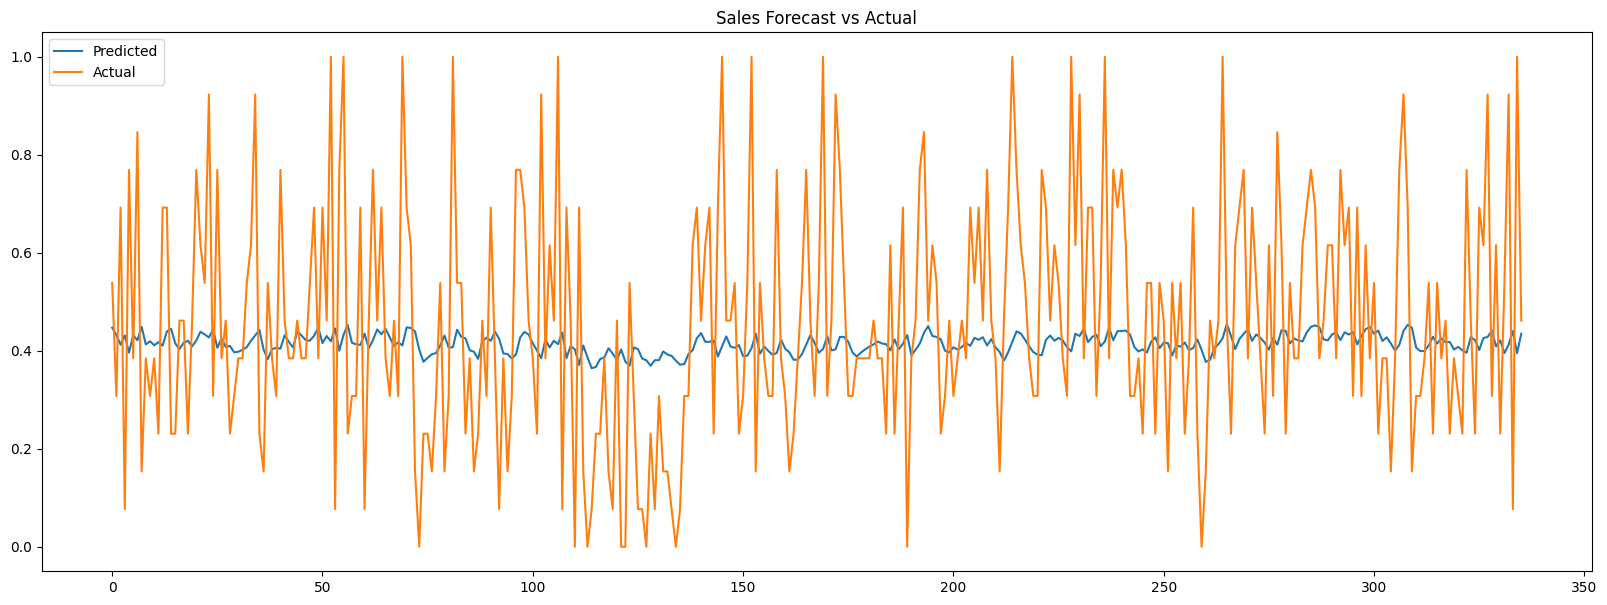

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# LSTM architecture
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

# Early stopping callback to stop training when the validation loss has not improved for 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

# Measure training time
start_time = tf.timestamp()

# Fitting to the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=35, validation_split=0.05, verbose=1, callbacks=[early_stopping])

# Calculate and print compilation time
print('Training time : {:.2f} seconds'.format(tf.timestamp() - start_time))

# Predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse transform to get original sales values
trainPredict = sales_scaler.inverse_transform(trainPredict)
trainY = sales_scaler.inverse_transform(y_train.reshape(-1, 1))
testPredict = sales_scaler.inverse_transform(testPredict)
testY = sales_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(20, 7))
plt.plot(pd.DataFrame(testPredict, columns=['Predicted']), label='Predicted')
plt.plot(pd.DataFrame(testY, columns=['Actual']), label='Actual')
plt.legend(loc='best')
plt.title('Sales Forecast vs Actual')
plt.show()

Epoch 1/100
37/37 [==============================] - 4s 23ms/step - loss: 0.1227 - val_loss: 0.0774
Epoch 2/100
37/37 [==============================] - 1s 15ms/step - loss: 0.0621 - val_loss: 0.0570
Epoch 3/100
37/37 [==============================] - 1s 16ms/step - loss: 0.0597 - val_loss: 0.0542
Epoch 4/100
37/37 [==============================] - 1s 14ms/step - loss: 0.0577 - val_loss: 0.0524
Epoch 5/100
37/37 [==============================] - 1s 15ms/step - loss: 0.0564 - val_loss: 0.0487
Epoch 6/100
37/37 [==============================] - 1s 16ms/step - loss: 0.0556 - val_loss: 0.0519
Epoch 7/100
37/37 [==============================] - 0s 11ms/step - loss: 0.0556 - val_loss: 0.0492
Epoch 8/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0560 - val_loss: 0.0545
Epoch 9/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0554 - val_loss: 0.0506
Epoch 10/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0544 - val_loss: 0.0530
Ep

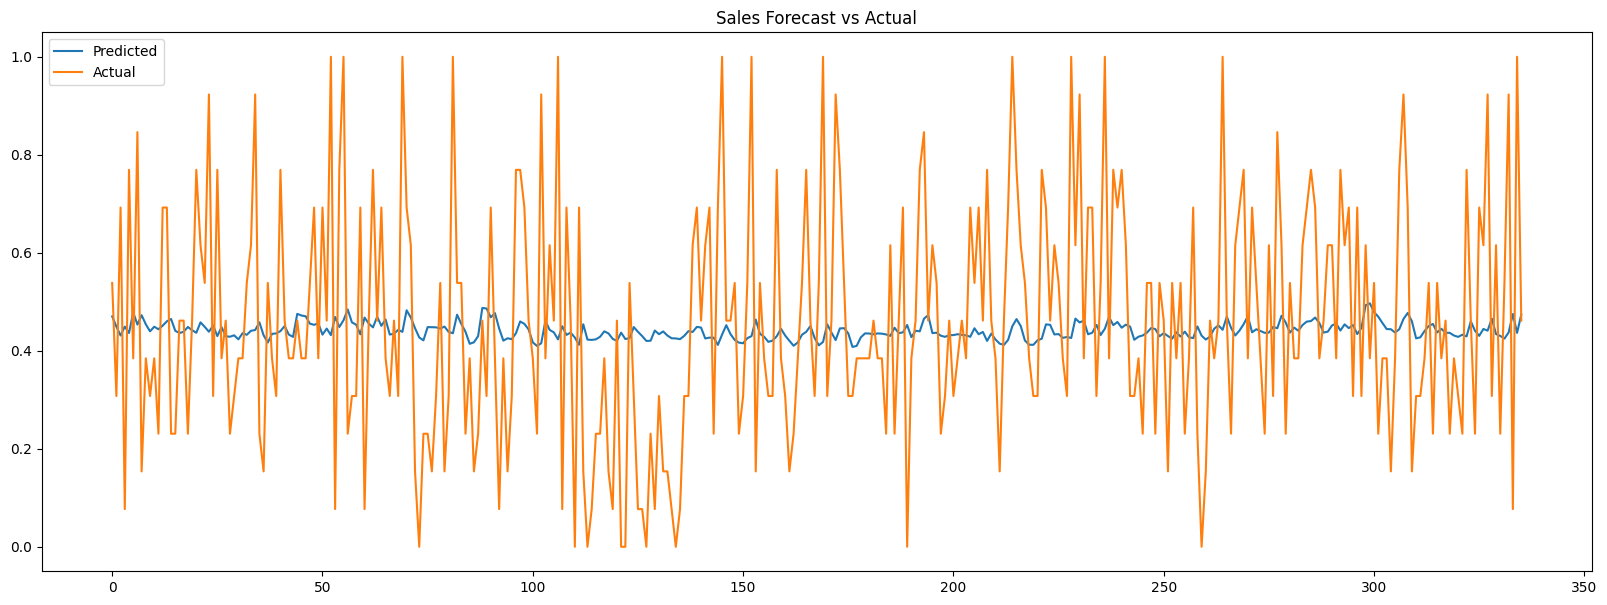

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

# Adjusted LSTM architecture to use Bidirectional LSTM
model = Sequential([
    Bidirectional(LSTM(units=50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(units=1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

# Early stopping callback to stop training when the validation loss has not improved for 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

# Measure training time
start_time = tf.timestamp()

# Fitting to the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=35, validation_split=0.05, verbose=1, callbacks=[early_stopping])

# Calculate and print compilation time
print('Training time : {:.2f} seconds'.format(tf.timestamp() - start_time))

# Predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Inverse transform to get original sales values
trainPredict = sales_scaler.inverse_transform(trainPredict)
trainY = sales_scaler.inverse_transform(y_train.reshape(-1, 1))
testPredict = sales_scaler.inverse_transform(testPredict)
testY = sales_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(20, 7))
plt.plot(pd.DataFrame(testPredict, columns=['Predicted']), label='Predicted')
plt.plot(pd.DataFrame(testY, columns=['Actual']), label='Actual')
plt.legend(loc='best')
plt.title('Sales Forecast vs Actual')
plt.show()


####**BEAUTY** (Belum Selesai)

In [ ]:
# buat DataFrame baru untuk family BEAUTY
cantik = df_train['family']=='BEAUTY'
cantik = df_train[cantik]
cantik

family  sales  onpromotion  dcoilwtico
date                                              
2013-01-01  BEAUTY    0.0            0       93.14
2013-01-02  BEAUTY    7.0            0       93.14
2013-01-03  BEAUTY    2.0            0       92.97
2013-01-04  BEAUTY    3.0            0       93.12
2013-01-05  BEAUTY    5.0            0       93.12
...            ...    ...          ...         ...
2017-08-11  BEAUTY    5.0            1       48.81
2017-08-12  BEAUTY   10.0            2       48.81
2017-08-13  BEAUTY    5.0            1       48.81
2017-08-14  BEAUTY    6.0            1       47.59
2017-08-15  BEAUTY    7.0            2       47.57

[1684 rows x 4 columns]

In [ ]:
cantik_sales = cantik.groupby('date')['sales'].sum()

In [ ]:
cantik_sales

date
2013-01-01     0.0
2013-01-02     7.0
2013-01-03     2.0
2013-01-04     3.0
2013-01-05     5.0
              ... 
2017-08-11     5.0
2017-08-12    10.0
2017-08-13     5.0
2017-08-14     6.0
2017-08-15     7.0
Name: sales, Length: 1684, dtype: float64

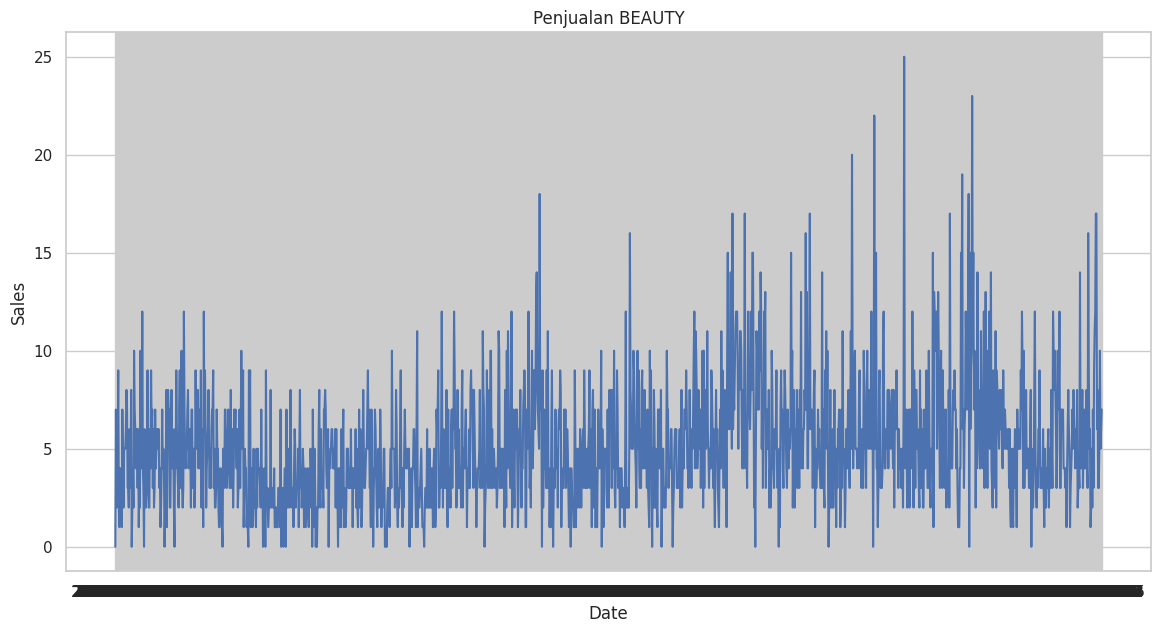

In [ ]:
# Melihat penjualan pada family BEAUTY
plt.figure(figsize=(14,7))
sns.set(style='whitegrid')
sns.lineplot(cantik_sales)
plt.title('Penjualan BEAUTY')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

<Axes: xlabel='date'>

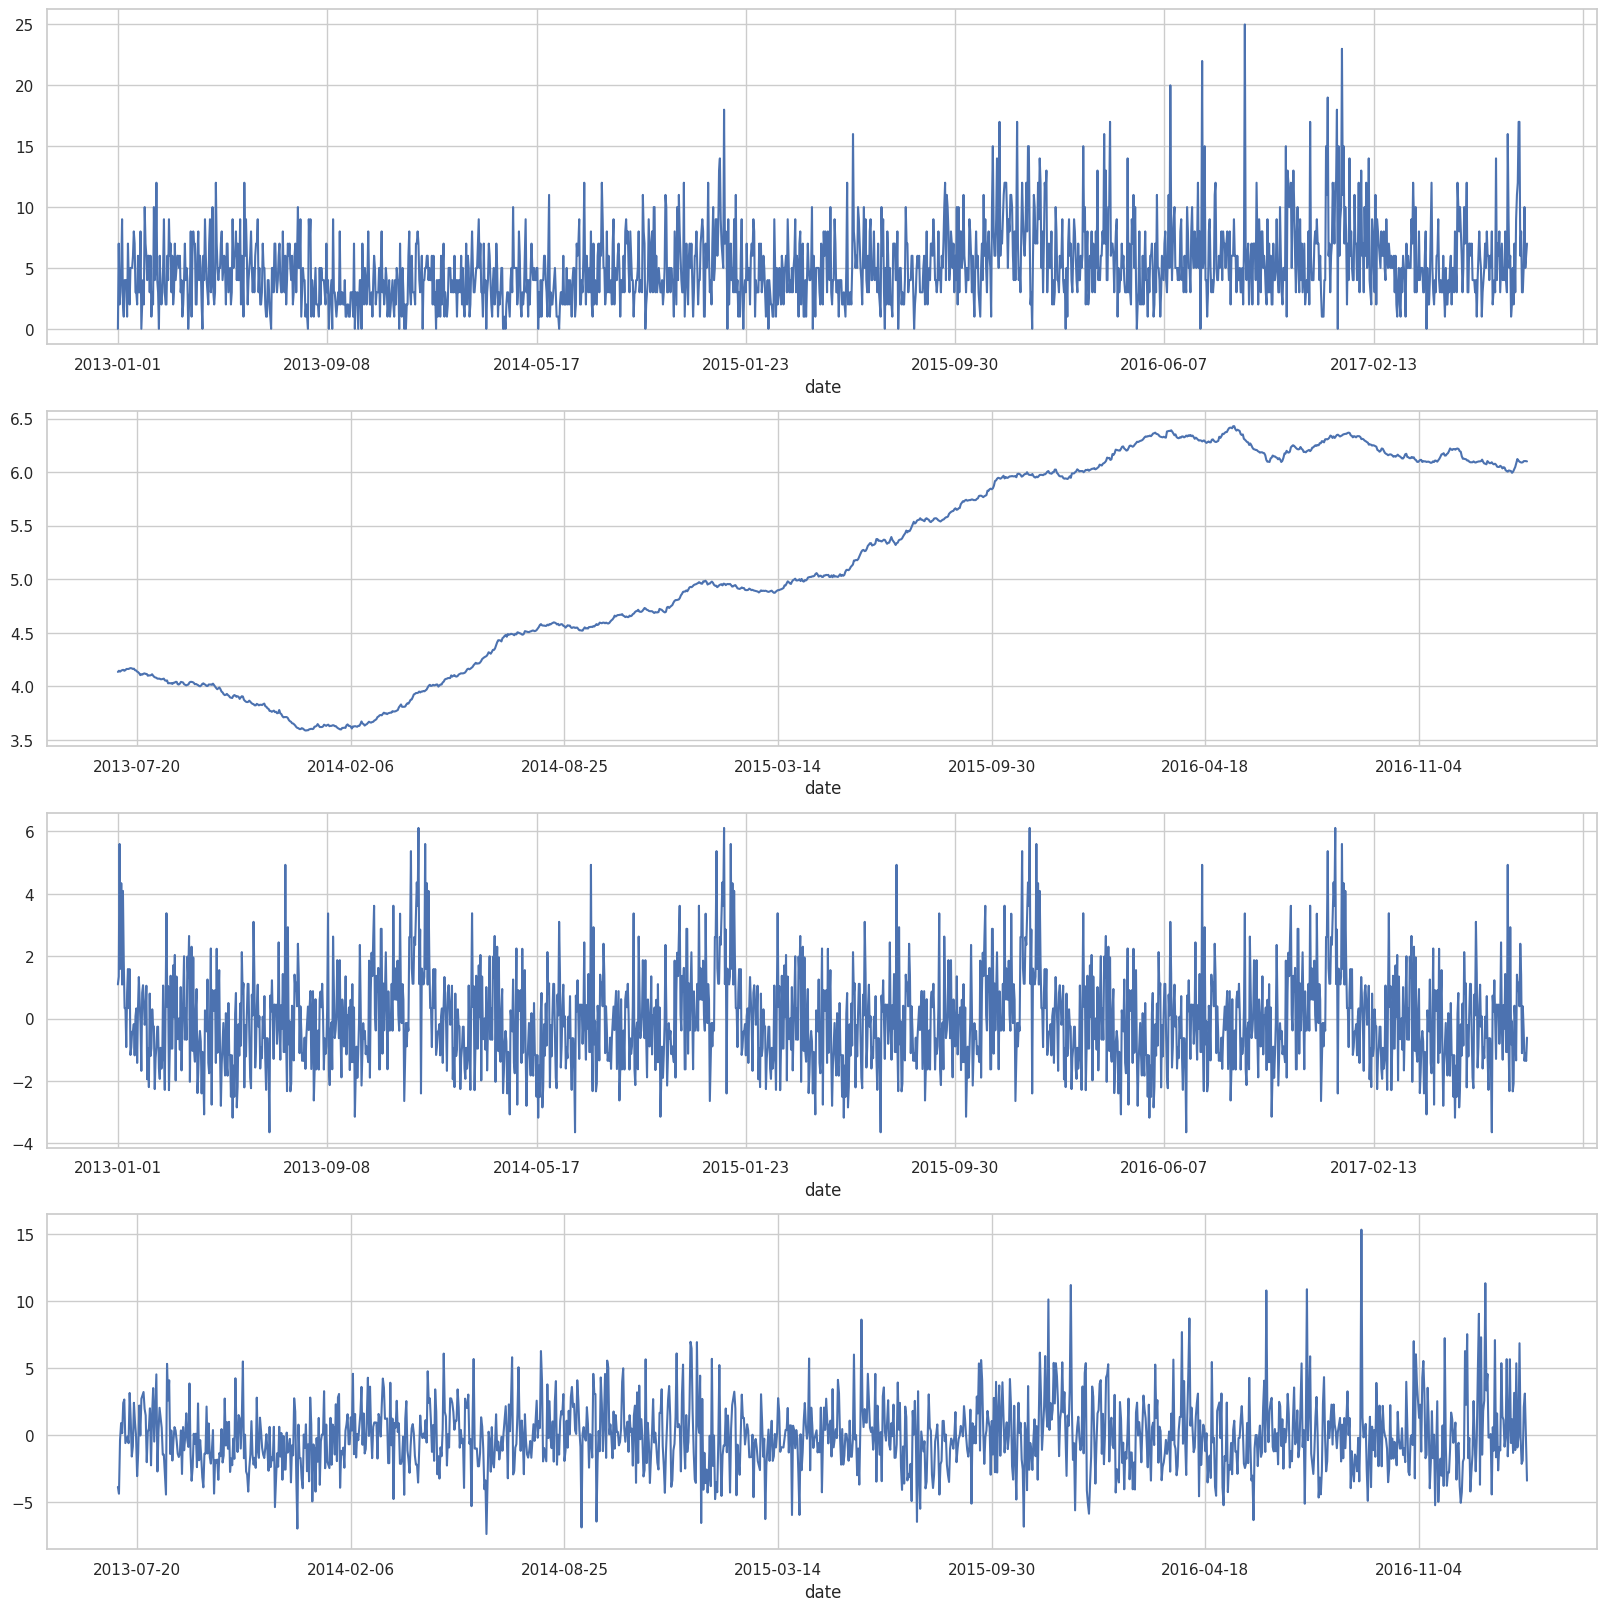

In [ ]:
#Yearly
plot_decompose = seasonal_decompose(cantik_sales, model='additive', period=365)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

<Axes: xlabel='date'>

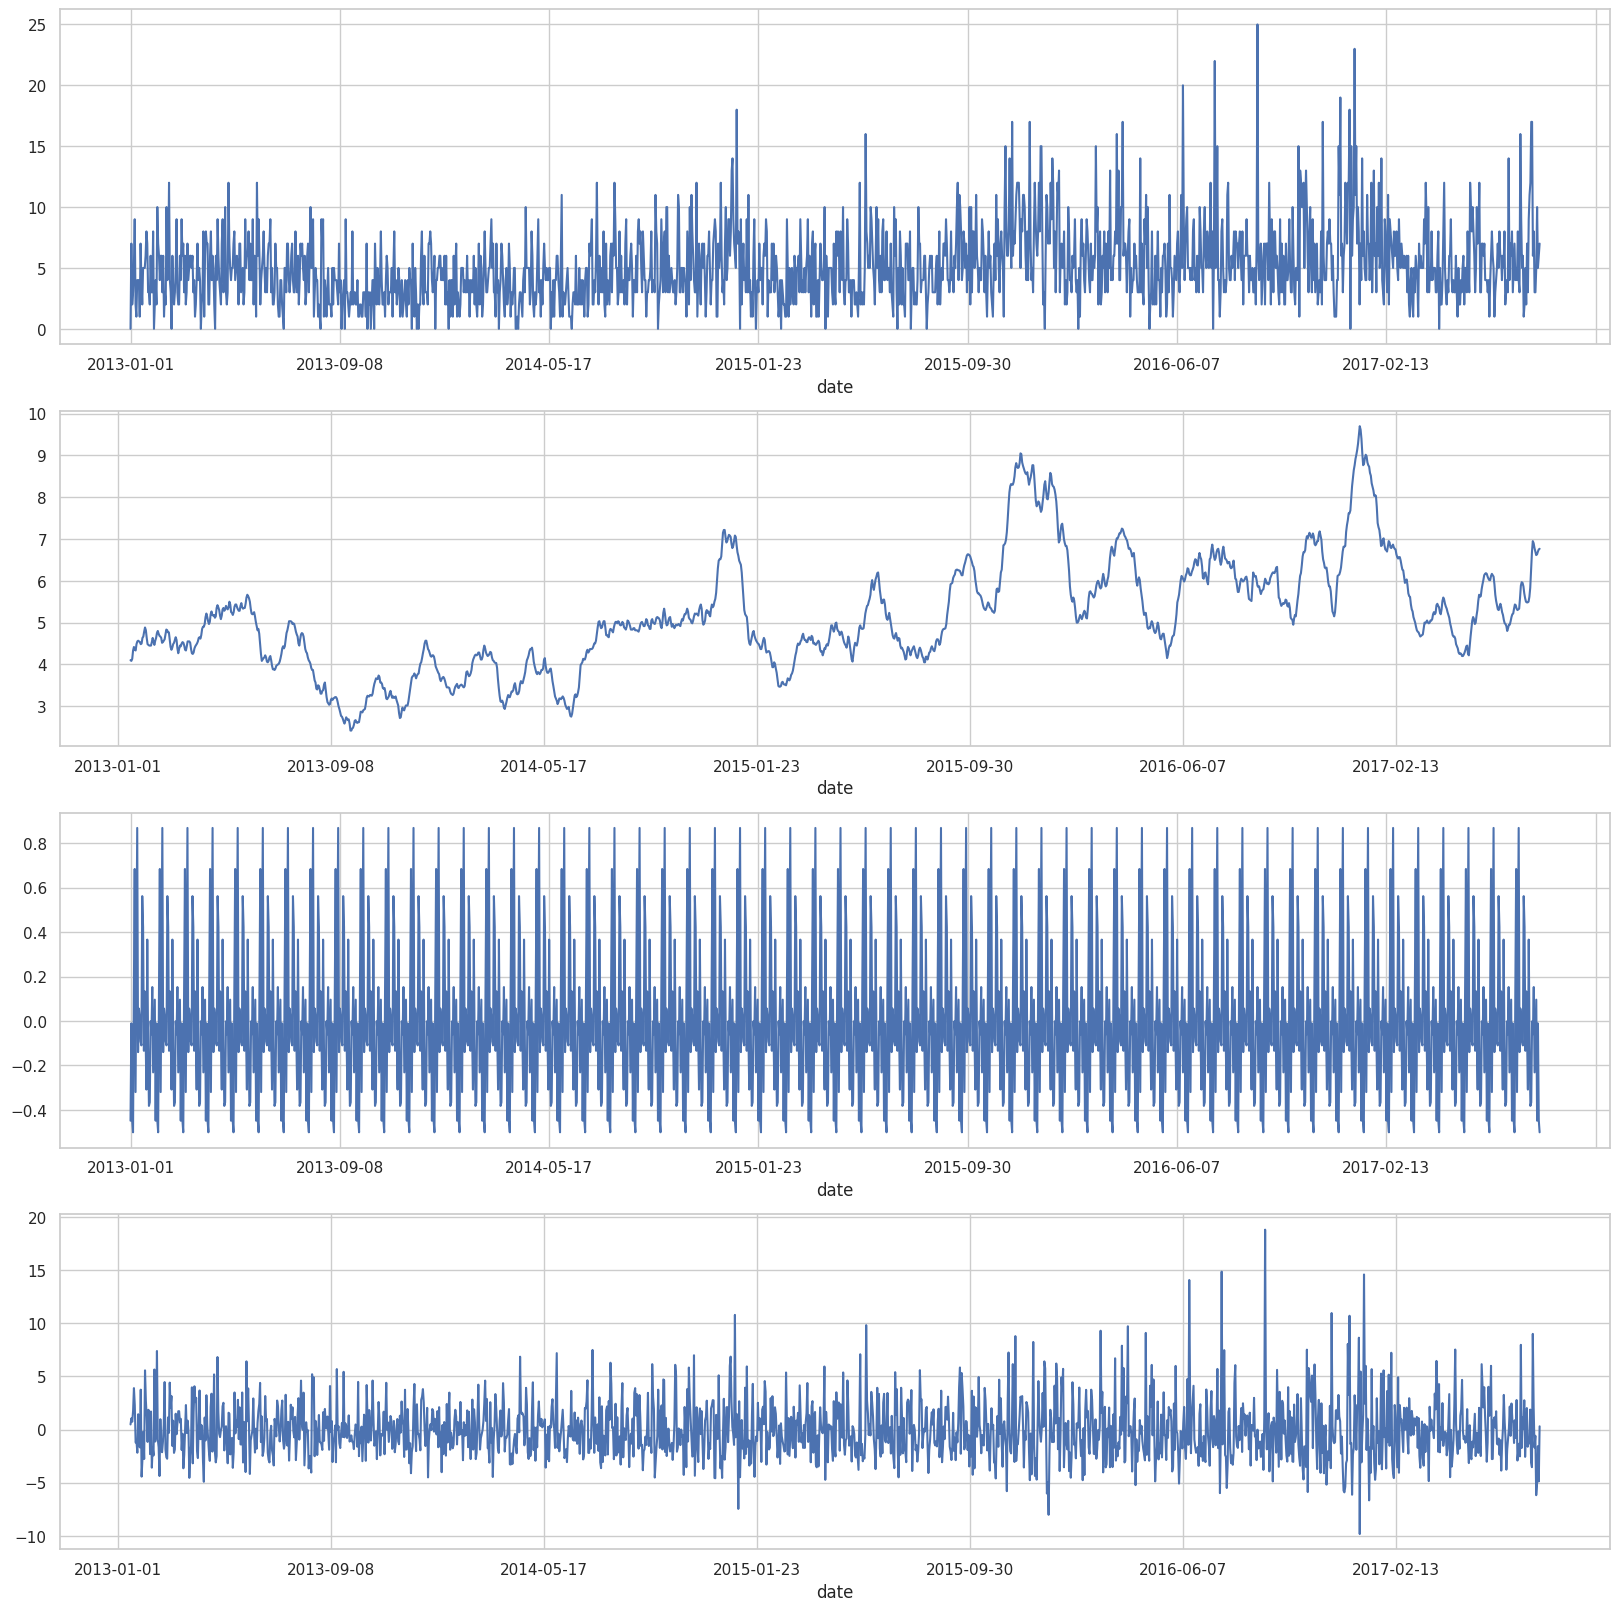

In [ ]:
plot_decompose = seasonal_decompose(cantik_sales, model='additive', period=30)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

<Axes: xlabel='date'>

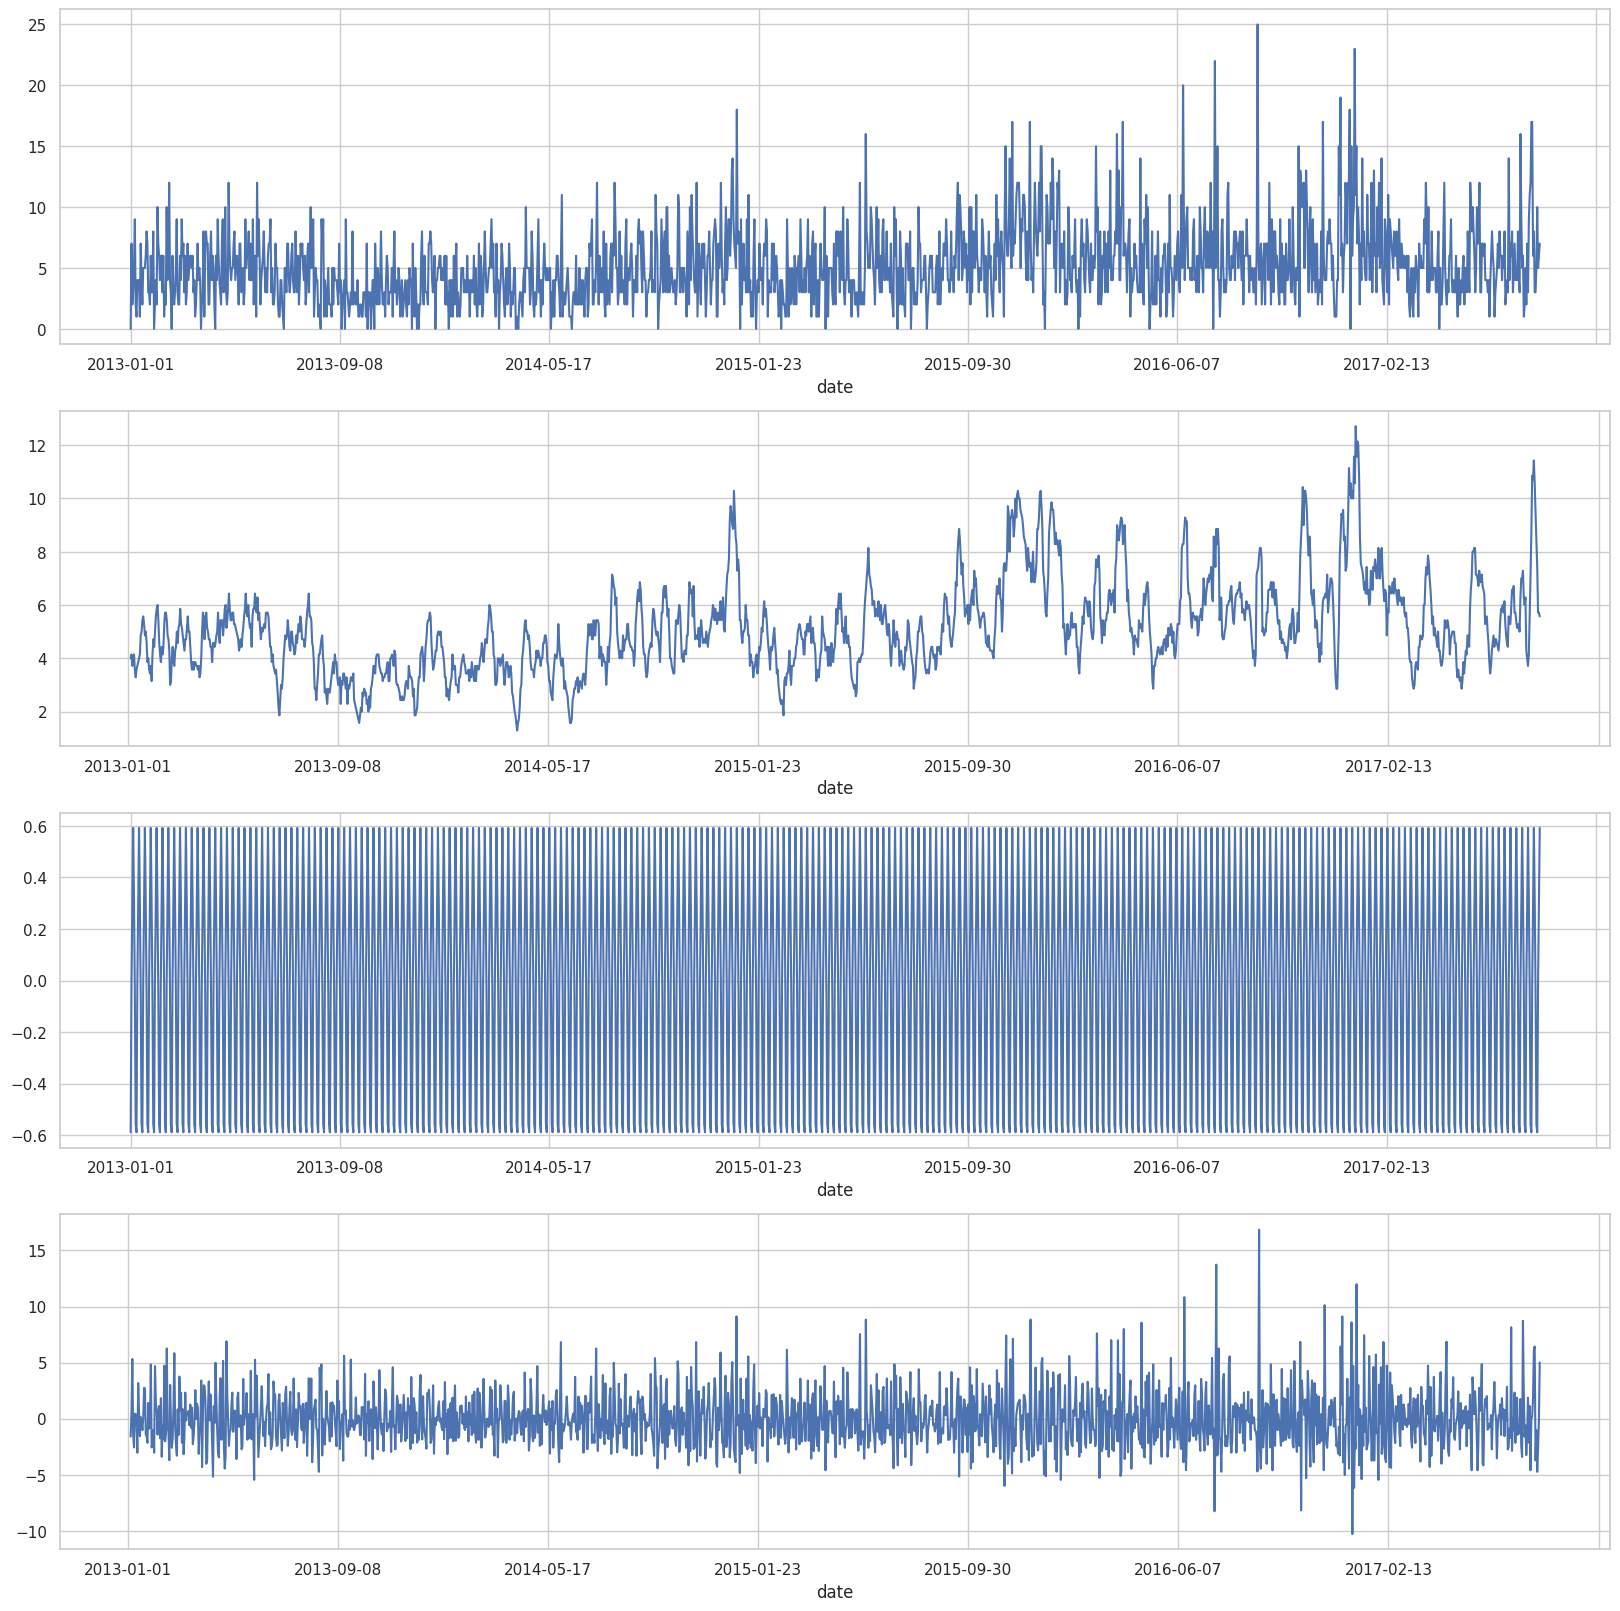

In [ ]:
plot_decompose = seasonal_decompose(cantik_sales, model='additive', period=7)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))
plot_decompose.observed.plot(ax=ax1)
plot_decompose.trend.plot(ax=ax2)
plot_decompose.seasonal.plot(ax=ax3)
plot_decompose.resid.plot(ax=ax4)

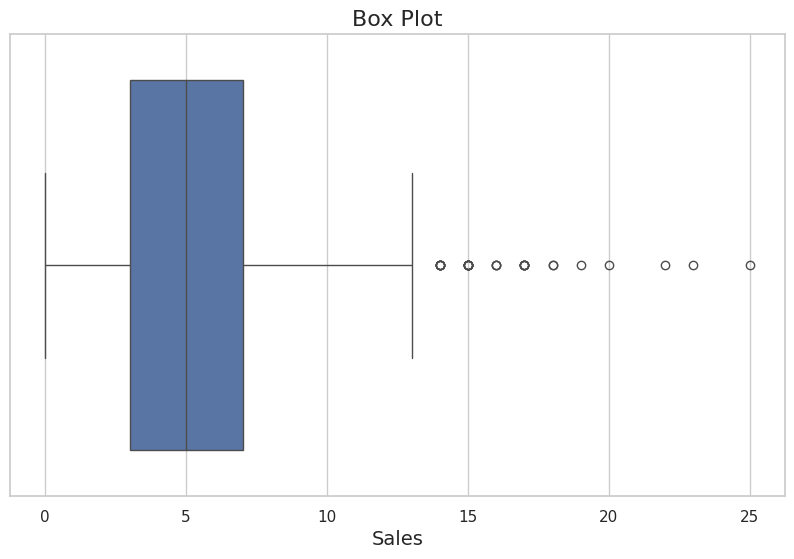

In [ ]:
# Deteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=cantik_sales)
plt.title('Box Plot', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.show()

In [ ]:
# Stationarity checking
from statsmodels.tsa.stattools import adfuller

cantik_adf = adfuller(cantik_sales)

print(f'ADF statistics: %f' %cantik_adf[0])
print(f'p-value: %f' %cantik_adf[1])
print(f'critical values: 1%: {cantik_adf[4]["1%"]}, 5%: {cantik_adf[4]["5%"]}, 10%: {cantik_adf[4]["10%"]}')


# [0] = ADF statistics --> harus lebih rendah dari critical value
# [1] = p-value --> nilai kemaknaan
# [4] = critical value 1%, 5%, 10%

ADF statistics: -5.088019
p-value: 0.000015
critical values: 1%: -3.4342930672797065, 5%: -2.8632816397229064, 10%: -2.567697207194407


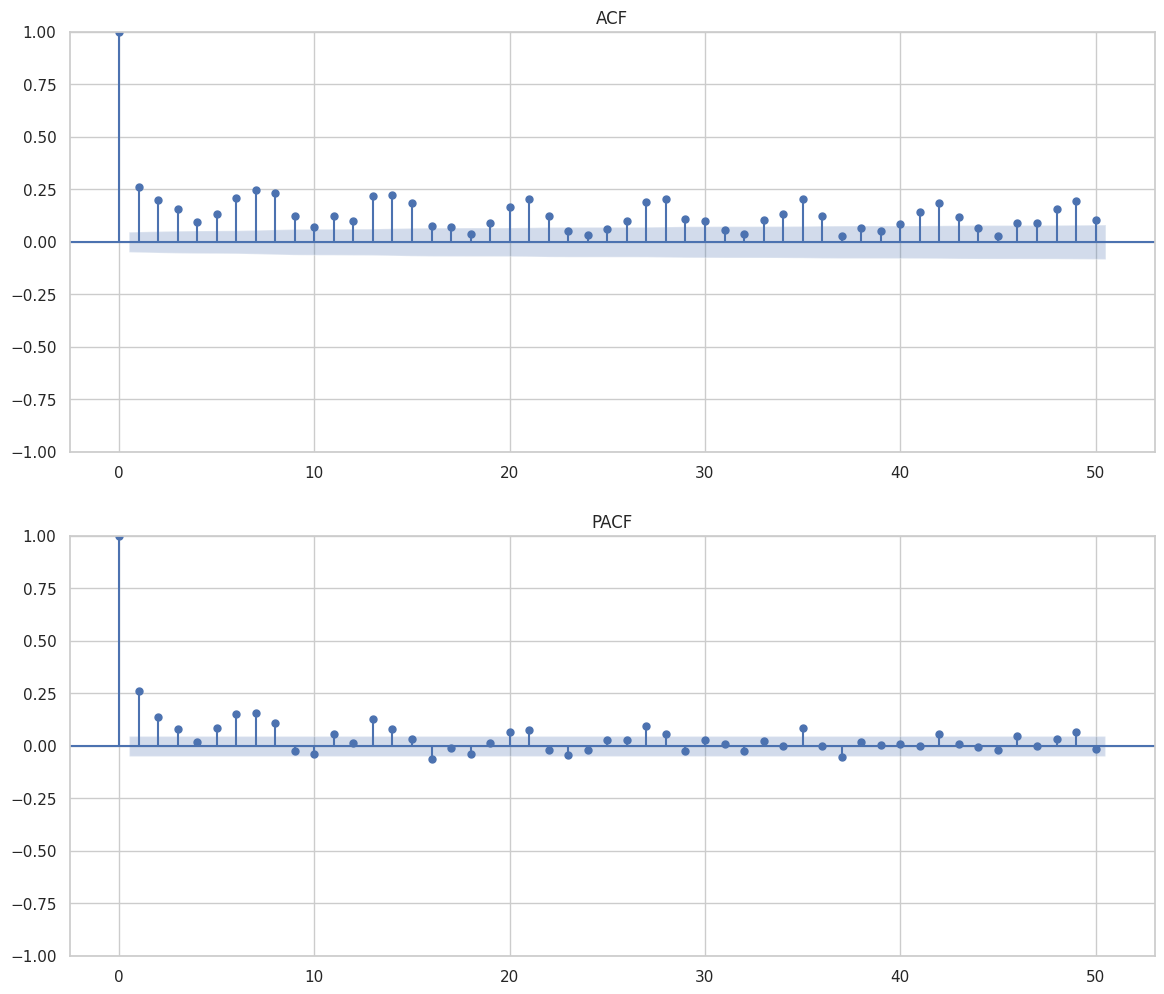

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# ACF plot
plot_acf(cantik_sales, lags=50, ax=ax1)
ax1.set_title('ACF')

# PACF plot
plot_pacf(cantik_sales, lags=50, ax=ax2)
ax2.set_title('PACF')

plt.show()

#####**Modeling ARIMA**

In [ ]:
train_size = int(len(cantik_sales) * 0.8) # data poin * 0.8 convert ke integer
train, test = cantik_sales[:train_size], cantik_sales[train_size:]

In [ ]:
# Fitting
model = ARIMA(train, order=(1, 0, 3))
model_arima_cantik1 = model.fit()

# Forecasting
forecast = model_arima_cantik1.forecast(steps=len(test)) # durasi sama dengan data test

print(model_arima_cantik1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1347
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -3324.638
Date:                Wed, 13 Mar 2024   AIC                           6661.275
Time:                        10:11:52   BIC                           6692.509
Sample:                             0   HQIC                          6672.974
                               - 1347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9271      0.134     36.665      0.000       4.664       5.191
ar.L1         -0.2052      0.190     -1.082      0.279      -0.577       0.167
ma.L1          0.4482      0.186      2.408      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Fitting
model = ARIMA(train, order=(1, 0, 8))
model_arima_cantik2 = model.fit()

# Forecasting
forecast = model_arima_cantik2.forecast(steps=len(test)) # durasi sama dengan data test

print(model_arima_cantik2.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1347
Model:                 ARIMA(1, 0, 8)   Log Likelihood               -3269.999
Date:                Wed, 13 Mar 2024   AIC                           6561.999
Time:                        10:12:19   BIC                           6619.261
Sample:                             0   HQIC                          6583.446
                               - 1347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.490     10.131      0.000       4.006       5.927
ar.L1          0.9898      0.006    159.465      0.000       0.978       1.002
ma.L1         -0.8411      0.029    -28.627      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#####**Modeling SARIMA**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
train_size = int(len(cantik_sales) * 0.8) # data poin * 0.8 convert ke integer
train, test = cantik_sales[:train_size], cantik_sales[train_size:]

In [ ]:
model = SARIMAX(train,
                order=(1, 0, 1),             # Non-seasonal parameters
                seasonal_order=(1, 0, 1, 7)) # Seasonal parameters (P, D, Q, s)

model_sarima = model.fit()

forecast = model_sarima.forecast(steps=len(test))

###**Iman (Hardware & Eggs)**

In [ ]:
eggs = data.loc[data['family'] == 'EGGS']
eggs = eggs.drop(columns = ['id', 'store_nbr', 'family'])
eggs['date'] = pd.to_datetime(eggs['date'])
eggs = eggs.set_index('date')

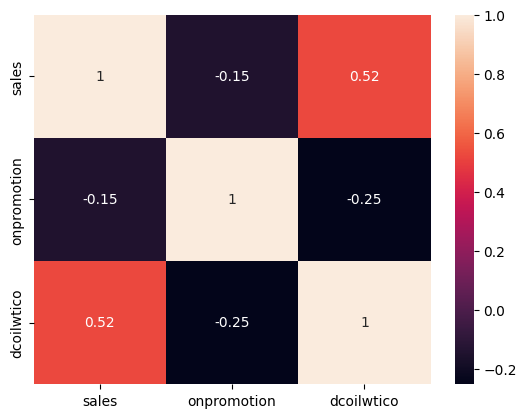

In [ ]:
correlation = eggs[['sales', 'onpromotion', 'dcoilwtico']]
correlation = correlation.corr(method = 'pearson')
sns.heatmap(correlation, annot = True)
plt.show()

Harga minyak berpengaruh terhadap penjualan telur

In [ ]:
eggs['year'] = eggs.index.year
eggs['month'] = eggs.index.month
eggs['week'] = eggs.index.isocalendar().week
eggs['day'] = eggs.index.day
eggs['weekday'] = eggs.index.weekday
eggs

sales  onpromotion  dcoilwtico  year  month  week  day  weekday
date                                                                       
2013-01-01    0.0            0         NaN  2013      1     1    1        1
2013-01-02  246.0            0       93.14  2013      1     1    2        2
2013-01-03  120.0            0       92.97  2013      1     1    3        3
2013-01-04  141.0            0       93.12  2013      1     1    4        4
2013-01-05  143.0            0         NaN  2013      1     1    5        5
...           ...          ...         ...   ...    ...   ...  ...      ...
2017-08-11   95.0           24       48.81  2017      8    32   11        4
2017-08-12   77.0            0         NaN  2017      8    32   12        5
2017-08-13  100.0            0         NaN  2017      8    32   13        6
2017-08-14   85.0            0       47.59  2017      8    33   14        0
2017-08-15   68.0            0       47.57  2017      8    33   15        1

[1684 rows x 8 columns]

Feature Engineering menambahkan kolom tahun, bulan, minggu, hari, dan weekday

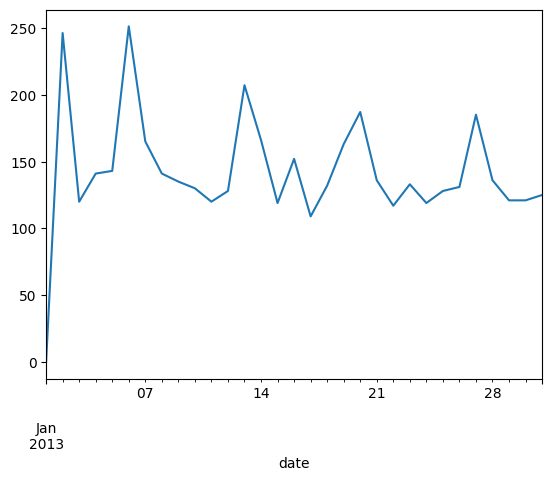

In [ ]:
eggs['sales'].head(31).plot()
plt.show()

Terlihat setiap hari ke-6(sabtu terdapat lonjakan), yang dapat diasumsikan terdapat season pada hari ke-6

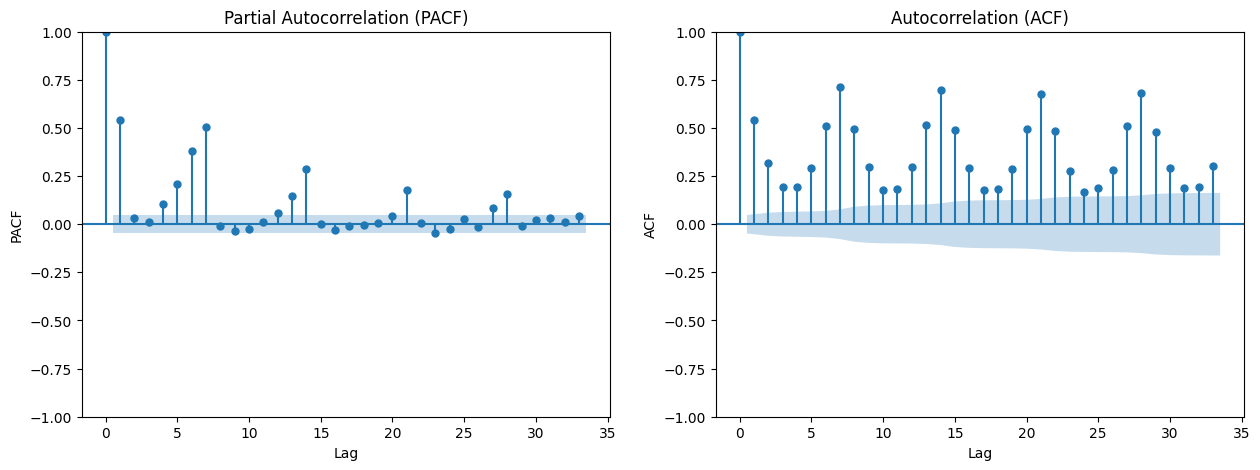

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_pacf(eggs['sales'], ax=axes[0])
axes[0].set_title('Partial Autocorrelation (PACF)')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('PACF')

plot_acf(eggs['sales'], ax=axes[1])
axes[1].set_title('Autocorrelation (ACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('ACF')

plt.show()

Dari plot ACF juga terlihat terdapat season dimana setiap lag ke-7 terdapat lonjakan, yang memperkuat asumsi sebelumnya

###**Aji (Meats & Pet Supplies)**

####**Meats**